## This notebook includes the following exploratory data anayes:
- summary statistics
- regression analyses
- PCA
- LDA

*The information collapsed can be ignored*

### Data wrangling and extraction... ###

This data was first uploaded from our INE database, organized, and then converted to a csv file for simpler sharing of the files.

The data contains information from the years 1989, 1999, 2009 and 2019 on the education levels and value, labor type and value, production value (in euros) and production area (in ha), livestock type and counts, temporary crop type, counts and area, permanent crop type, counts (in number of holdings), and area, and permanent crop type, counts (in number of holdings), and area. All of the rows of data are organized by freguesia name. 

In [2]:
#importing the data and understanding what we are working wtih

import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# get basic info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11528 entries, 0 to 11527
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   NutsID                         11528 non-null  object 
 1   DICOFRE                        11528 non-null  object 
 2   region_name                    11528 non-null  object 
 3   year                           11528 non-null  int64  
 4   edu_none                       11528 non-null  int64  
 5   edu_basic                      11528 non-null  int64  
 6   edu_secondary                  11528 non-null  int64  
 7   edu_superior                   11528 non-null  int64  
 8   labour_family                  11528 non-null  int64  
 9   labour_holder                  11528 non-null  int64  
 10  labour_spouse                  11528 non-null  int64  
 11  labour_other_family            11528 non-null  int64  
 12  labour_non_family              11528 non-null 

In [3]:
print("Shape of the dataframe: ",data.shape)
data.isna().sum()

Shape of the dataframe:  (11528, 52)


NutsID                              0
DICOFRE                             0
region_name                         0
year                                0
edu_none                            0
edu_basic                           0
edu_secondary                       0
edu_superior                        0
labour_family                       0
labour_holder                       0
labour_spouse                       0
labour_other_family                 0
labour_non_family                   0
labour_regular                      0
labour_non_regular                  0
labour_not_hired                    0
production_eur                   2984
production_area                  2984
cereals_area                        0
dried_pulses_area                   0
grasses_area                        0
fodder_area                         0
potatoes_area                       0
sugarbeets_area                     0
industrial_crops_area               0
fresh_veg_area                      0
flowers_area

In [4]:
# Summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)

               year      edu_none     edu_basic  edu_secondary  edu_superior  \
count  11528.000000  11528.000000  11528.000000    11528.00000  11528.000000   
mean    2004.000000    118.076856    204.742280       28.80465     15.493147   
std       11.180825    163.280984    206.063604       32.19049     19.082666   
min     1989.000000      0.000000      0.000000        0.00000      0.000000   
25%     1996.500000     23.000000     79.000000        9.00000      4.000000   
50%     2004.000000     61.000000    146.000000       19.00000      9.000000   
75%     2011.500000    149.000000    257.000000       37.00000     20.000000   
max     2019.000000   2088.000000   2381.000000      394.00000    212.000000   

       labour_family  labour_holder  labour_spouse  labour_other_family  \
count   11528.000000   11528.000000   11528.000000         11528.000000   
mean      135.850017      67.254511      43.840996            24.859386   
std       151.810015      70.284225      56.570835    

In [5]:
#see columns I am working with 

# Replace 'area.1' in column names with 'count'
data.columns = [col.replace('area.1', 'count') for col in data.columns]

# Display the updated columns to verify the changes
data.columns.tolist()


['NutsID',
 'DICOFRE',
 'region_name',
 'year',
 'edu_none',
 'edu_basic',
 'edu_secondary',
 'edu_superior',
 'labour_family',
 'labour_holder',
 'labour_spouse',
 'labour_other_family',
 'labour_non_family',
 'labour_regular',
 'labour_non_regular',
 'labour_not_hired',
 'production_eur',
 'production_area',
 'cereals_area',
 'dried_pulses_area',
 'grasses_area',
 'fodder_area',
 'potatoes_area',
 'sugarbeets_area',
 'industrial_crops_area',
 'fresh_veg_area',
 'flowers_area',
 'other_temp_crops_area',
 'cereals_count',
 'dried_pulses_count',
 'grasses_count',
 'fodder_count',
 'potatoes_count',
 'sugarbeets_count',
 'industrial_crops_count',
 'fresh_veg_count',
 'flowers_count',
 'other_temp_crops_count',
 'fresh_fruit_area',
 'citrus_area',
 'fruit_area',
 'nuts_area',
 'olive_area',
 'vineyards_area',
 'other_permanent_crop_area',
 'fresh_fruit_holdings',
 'citrus_holdings',
 'fruit_holdings',
 'nuts_holdings',
 'olive_holdings',
 'vineyard_holdings',
 'other_permanent_crop_holdin

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = data

# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                                 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

# Calculate mean values for each group of columns
mean_labour = df[labour_columns].mean()
mean_production = df[production_columns].mean()
mean_edu = df[edu_columns].mean()
mean_agricultural_activity = df[agricultural_activity_columns].mean()

print(mean_labour)
print(mean_production)
print(mean_edu)
print(mean_agricultural_activity)



labour_family          135.850017
labour_holder           67.254511
labour_spouse           43.840996
labour_other_family     24.859386
labour_non_family       32.673924
labour_regular          17.291898
labour_non_regular      13.704545
labour_not_hired         1.653626
dtype: float64
production_eur     1.715310e+06
production_area    3.177972e+03
dtype: float64
edu_none         118.076856
edu_basic        204.742280
edu_secondary     28.804650
edu_superior      15.493147
dtype: float64
fresh_fruit_holdings             19.833969
citrus_holdings                  10.930690
fruit_holdings                    0.695437
nuts_holdings                    17.397901
olive_holdings                   51.954806
vineyard_holdings                72.094466
other_permanent_crop_holdings     0.577724
dtype: float64


In [ ]:
#not useful, don't need

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for labour columns
axes[0, 0].bar(mean_labour.index, mean_labour.values, color='blue')
axes[0, 0].set_title('Average Labour Values')
axes[0, 0].set_ylabel('Mean Value')

# Plot for production columns
axes[0, 1].bar(mean_production.index, mean_production.values, color='green')
axes[0, 1].set_title('Average Production Values')
axes[0, 1].set_ylabel('Mean Value')

# Plot for education columns
axes[1, 0].bar(mean_edu.index, mean_edu.values, color='orange')
axes[1, 0].set_title('Average Education Values')
axes[1, 0].set_ylabel('Mean Value')

# Plot for agricultural activity columns
axes[1, 1].bar(mean_agricultural_activity.index, mean_agricultural_activity.values, color='red')
axes[1, 1].set_title('Average Agricultural Activity Values')
axes[1, 1].set_ylabel('Mean Value')

# Adjust layout
plt.subplots_adjust(left=0.1, right=0.1,  bottom=0.1, top=0.9, wspace=0.3, hspace=0.3)

# Show plots
plt.show()

# print averages
print('mean_labour')
print('mean_agricultural_activity')
print('mean_edu')
print('mean_production')

In [5]:
# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 'cereals_count',
                                 'dried_pulses_count', 'fodder_count', 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']


Histograms to see how our information is distributed

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 'cereals_count',
                                 'dried_pulses_count', 'fodder_count', 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Create histograms for each group of columns
def create_histograms(data, columns, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns, 1):
        plt.subplot(5, 5, i)  # Adjust the grid size as needed
        sns.histplot(data[column].dropna(), kde=True)
        plt.title(column)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is defined elsewhere in your script or notebook

# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 'cereals_count',
                                 'dried_pulses_count', 'fodder_count', 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Create histograms for each group of columns
def create_histograms(data, columns, title):
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns, 1):
        plt.subplot(5, 5, i)  # Adjust the grid size as needed
        sns.histplot(data[column].dropna(), kde=True)
        plt.title(column)
    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


## Histograms ##

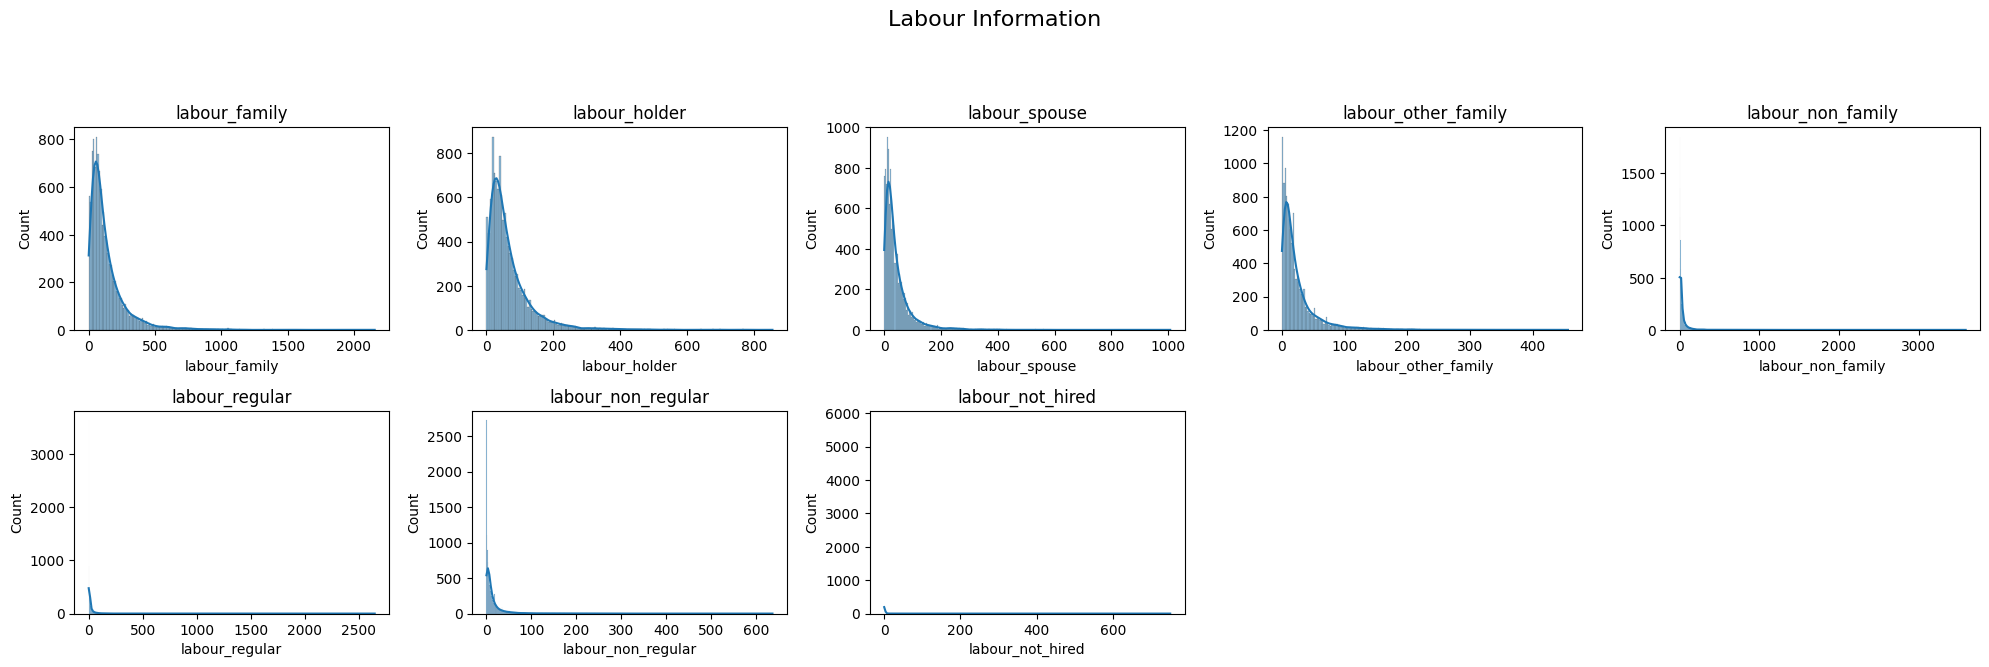

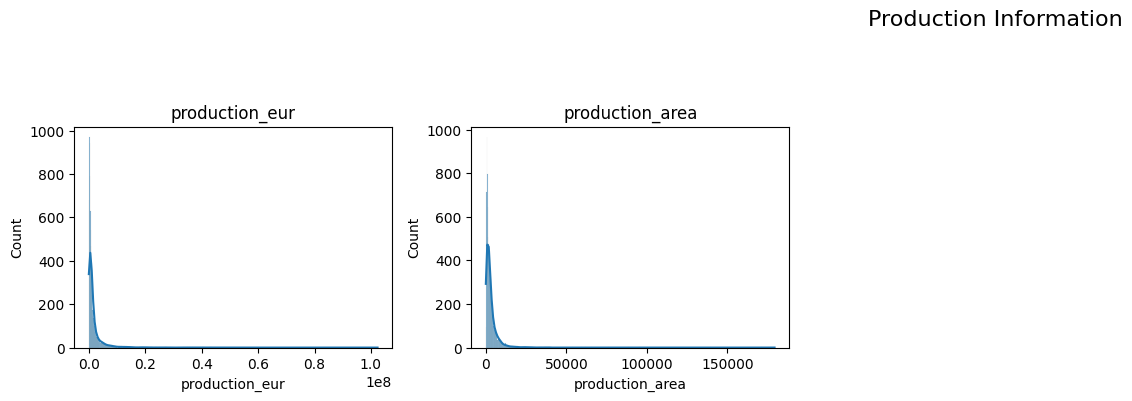

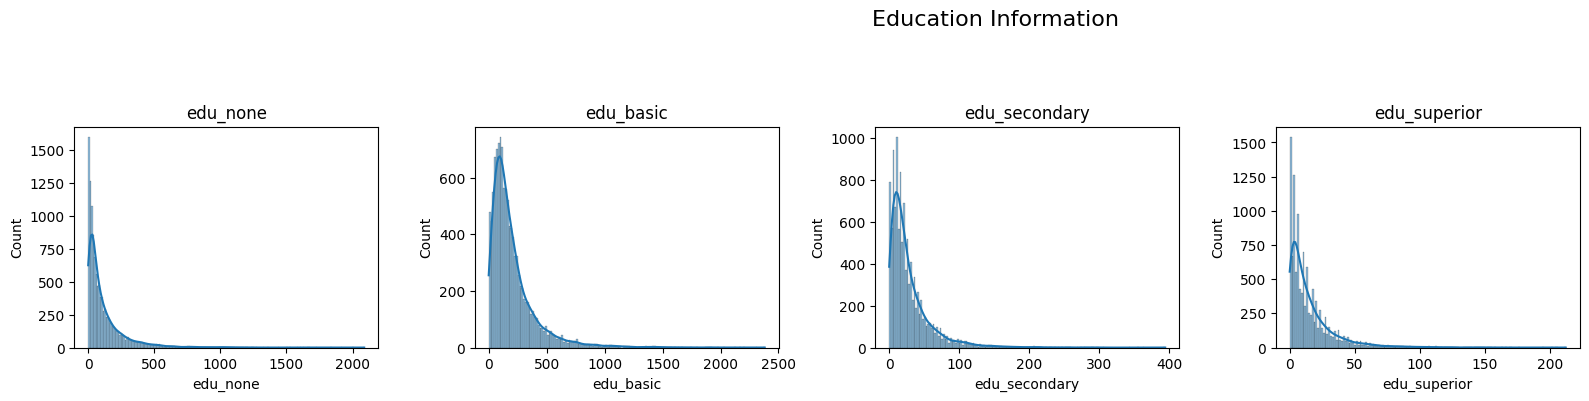

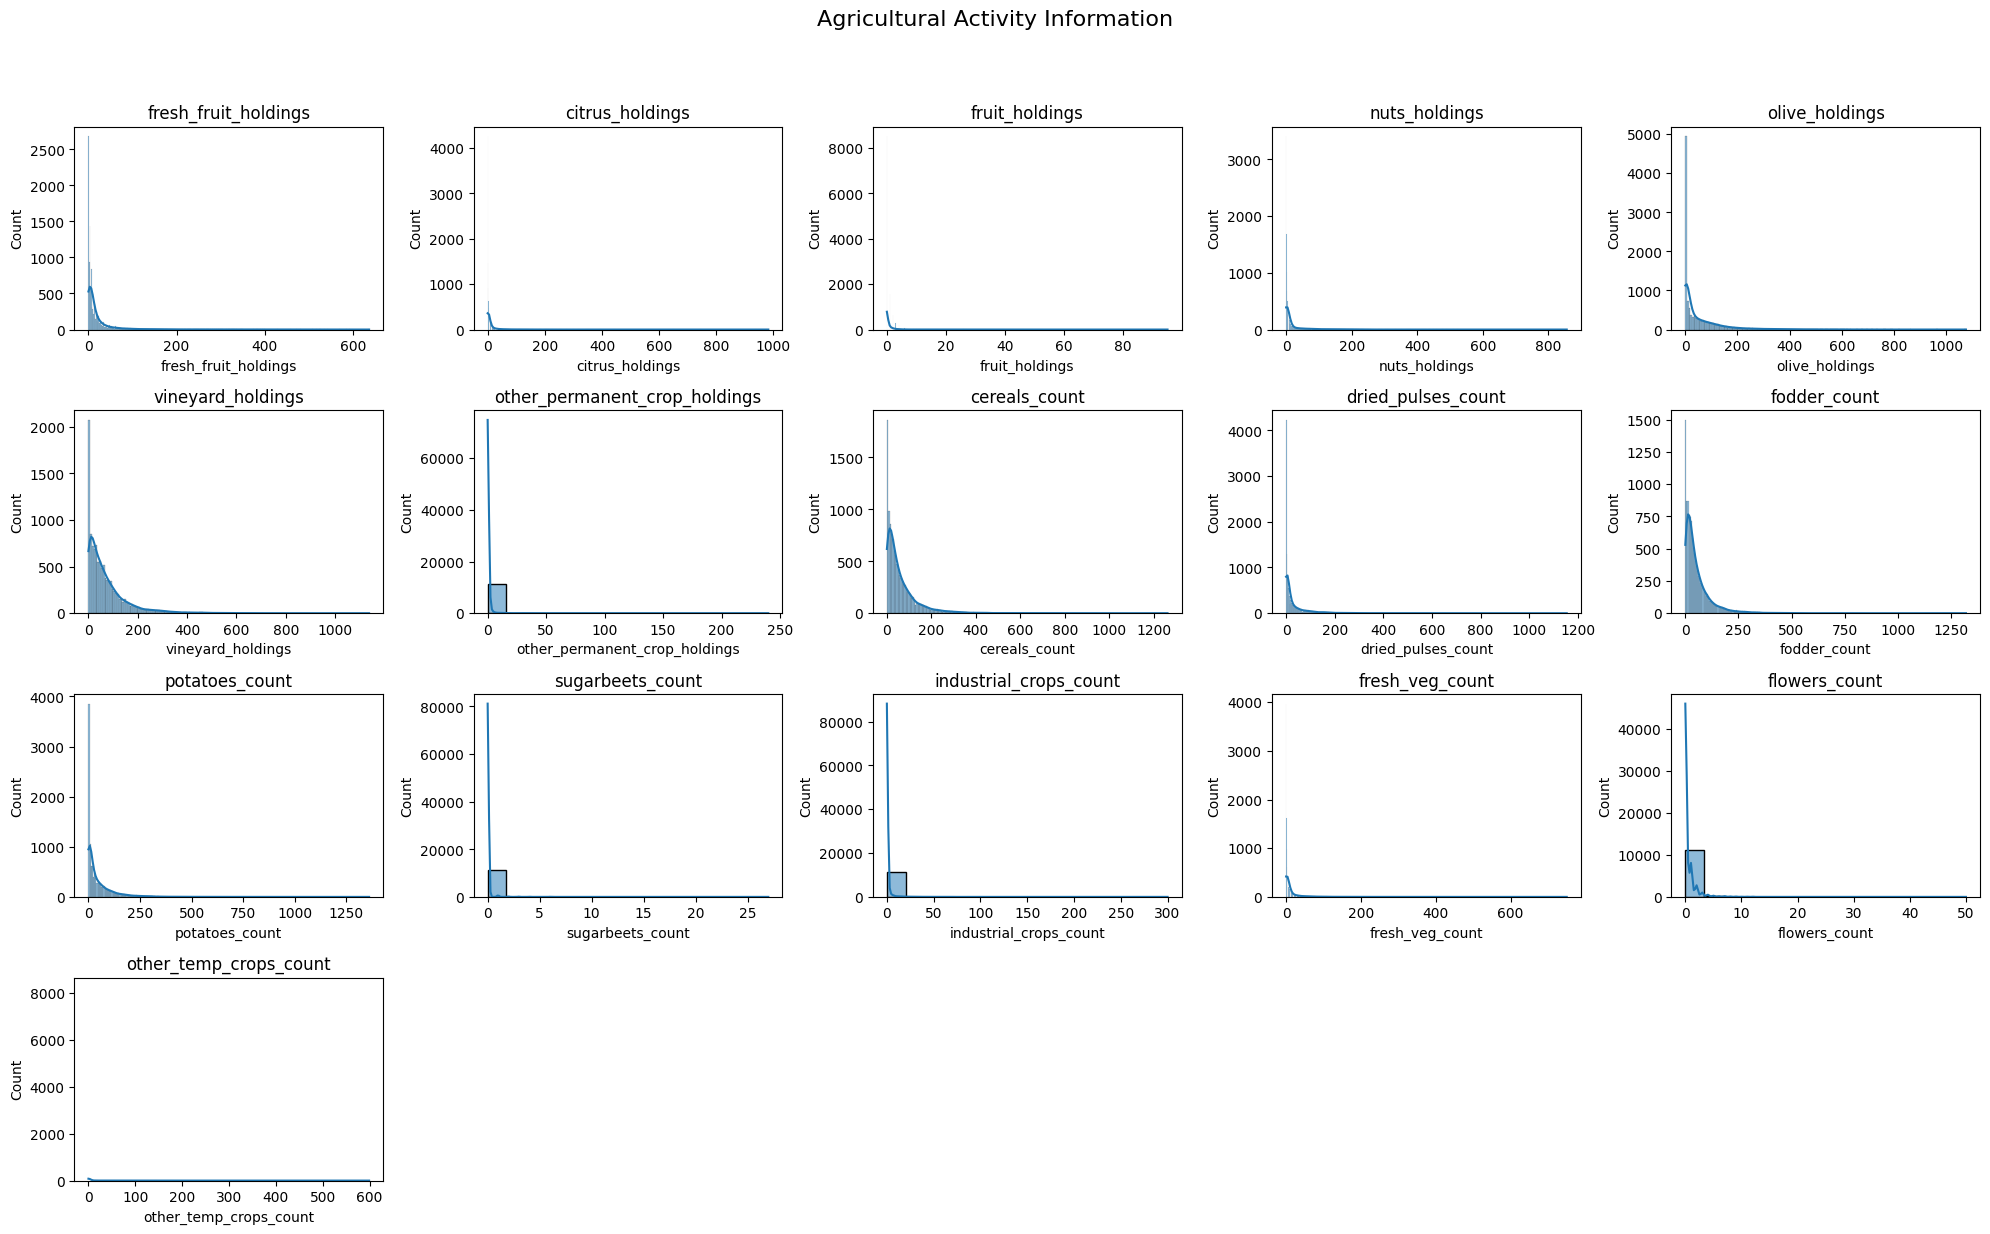

In [7]:
# Assuming `data` is your DataFrame containing the relevant columns

# Histograms for labour info
create_histograms(data, labour_columns, 'Labour Information')

# Histograms for production info
create_histograms(data, production_columns, 'Production Information')

# Histograms for edu info
create_histograms(data, edu_columns, 'Education Information')

# Histograms for agricultural activity info
create_histograms(data, agricultural_activity_columns, 'Agricultural Activity Information')

## more data wrangling ##

In [28]:
# a try at reorganizing the columns
import pandas as pd

# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                                 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
                                 'cereals_count', 'dried_pulses_count', 'fodder_count', 
                                 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                                 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Create a new DataFrame with organized columns
organized_data = data[['year', 'region_name'] + labour_columns + production_columns + edu_columns + agricultural_activity_columns]

# Display the first few rows of the new DataFrame
organized_data.head()


year       region_name  labour_family  labour_holder  labour_spouse  \
0  2019  Aboim das Chocas             34             15             13   
1  2009  Aboim das Chocas             50             24             19   
2  1999  Aboim das Chocas             62             26             22   
3  1989  Aboim das Chocas            163             70             55   
4  2019             Aguia             70             38             27   

   labour_other_family  labour_non_family  labour_regular  labour_non_regular  \
0                    6                  2               1                   0   
1                    8                  1               0                   0   
2                   14                  2               0                   2   
3                   38                  6               1                   5   
4                    5                  3               0                   2   

   labour_not_hired  ...  other_permanent_crop_holdings  cereals_count  \
0                 0  ...                              0             19   
1                 0  ...                              0             24   
2                 0  ...                              0             35   
3                 0  ...                              0             78   
4                 0  ...                              0             27   

   dried_pulses_count  fodder_count  potatoes_count  sugarbeets_count  \
0                   1             7               7                 0   
1                  14            29              21                 0   
2                   5            34              19                 0   
3                  76            80              58                 0   
4                   0            27               0                 0   

   industrial_crops_count  fresh_veg_count  flowers_count  \
0                       0                0              0   
1                       0                0              0   
2                       0                0              0   
3                       0                0              0   
4                       0                0              0   

   other_temp_crops_count  
0                       0  
1                       0  
2                      10  
3                      74  
4                       0  

[5 rows x 32 columns]

In [29]:
# Define groups of columns
labour_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                  'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
production_columns = ['production_eur', 'production_area']
edu_columns = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']
agricultural_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                                 'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings', 
                                 'cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                                 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                                 'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Melt labour columns
labour_melted = data.melt(id_vars=['year', 'region_name'], value_vars=labour_columns, 
                          var_name='labour_type', value_name='labour_value')

# Melt production columns
production_melted = data.melt(id_vars=['year', 'region_name'], value_vars=production_columns, 
                              var_name='production_type', value_name='production_value')

# Melt education columns
edu_melted = data.melt(id_vars=['year', 'region_name'], value_vars=edu_columns, 
                       var_name='edu_type', value_name='edu_value')

# Melt agricultural activity columns
agriculture_melted = data.melt(id_vars=['year', 'region_name'], value_vars=agricultural_activity_columns, 
                               var_name='agricultural_activity_type', value_name='agricultural_activity_value')

In [30]:
import pandas as pd

# Assuming you have already defined and melted your dataframes as described

# Pivot each melted DataFrame
labour_pivot = labour_melted.pivot_table(index=['year', 'region_name'], columns='labour_type', values='labour_value').reset_index()
production_pivot = production_melted.pivot_table(index=['year', 'region_name'], columns='production_type', values='production_value').reset_index()
edu_pivot = edu_melted.pivot_table(index=['year', 'region_name'], columns='edu_type', values='edu_value').reset_index()
agriculture_pivot = agriculture_melted.pivot_table(index=['year', 'region_name'], columns='agricultural_activity_type', values='agricultural_activity_value').reset_index()

# Merge all pivoted DataFrames
merged_df = pd.merge(labour_pivot, production_pivot, on=['year', 'region_name'], how='outer')
merged_df = pd.merge(merged_df, edu_pivot, on=['year', 'region_name'], how='outer')
merged_df = pd.merge(merged_df, agriculture_pivot, on=['year', 'region_name'], how='outer')

# Display the first few rows of the merged DataFrame
print("Merged DataFrame:")
print(merged_df.head())


Merged DataFrame:
   year     region_name  labour_family  labour_holder  labour_non_family  \
0  1989   A dos Francos          406.0          216.0               50.0   
1  1989    A dos Negros          462.0          232.0               68.0   
2  1989          Abacas          292.0          171.0              138.0   
3  1989  Abade de Neiva          156.0           57.0               27.0   
4  1989          Abadim          245.0           82.0               14.0   

   labour_non_regular  labour_not_hired  labour_other_family  labour_regular  \
0                44.0               2.0                 69.0             4.0   
1                51.0               3.0                101.0            13.0   
2               127.0               0.0                 56.0            11.0   
3                 7.0               1.0                 51.0            19.0   
4                13.0               1.0                 90.0             0.0   

   labour_spouse  ...  fruit_holdings  grass

## stacked bar plots ##

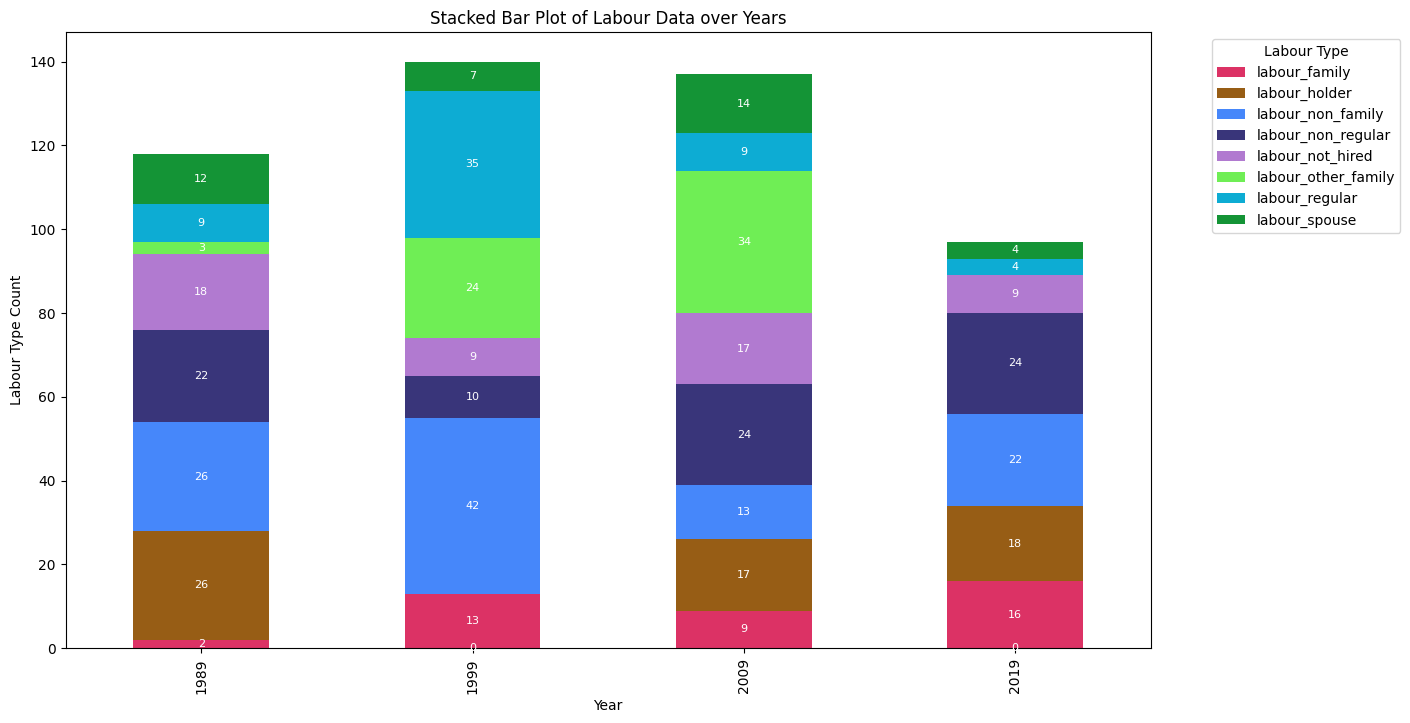

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example data (assuming labour_melted is defined elsewhere)
labour_melted = pd.DataFrame({
    'year': np.random.choice([1989, 1999, 2009, 2019], size=100),
    'labour_value': np.random.randint(1, 10, size=100),  # Example random values for labour counts
    'labour_type': np.random.choice(['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family',
                                     'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired'], size=100)
})

# Aggregate data by year and labour type
agg_data = labour_melted.groupby(['year', 'labour_type']).sum().reset_index()

# Pivot the data for the stacked bar plot
pivot_data = agg_data.pivot(index='year', columns='labour_type', values='labour_value').fillna(0)

# Plotting the stacked bar plot with annotations
def plot_stacked_bar(data):
    ax = data.plot(kind='bar', stacked=True, figsize=(14, 8), 
                   color=[np.random.rand(3,) for _ in range(len(data.columns))])
    
    # Annotate each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{height:.0f}', (x + width / 2, y + height / 2), 
                    ha='center', va='center', fontsize=8, color='white')

    plt.title('Stacked Bar Plot of Labour Data over Years')
    plt.xlabel('Year')
    plt.ylabel('Labour Type Count')
    plt.legend(title='Labour Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_stacked_bar(pivot_data)


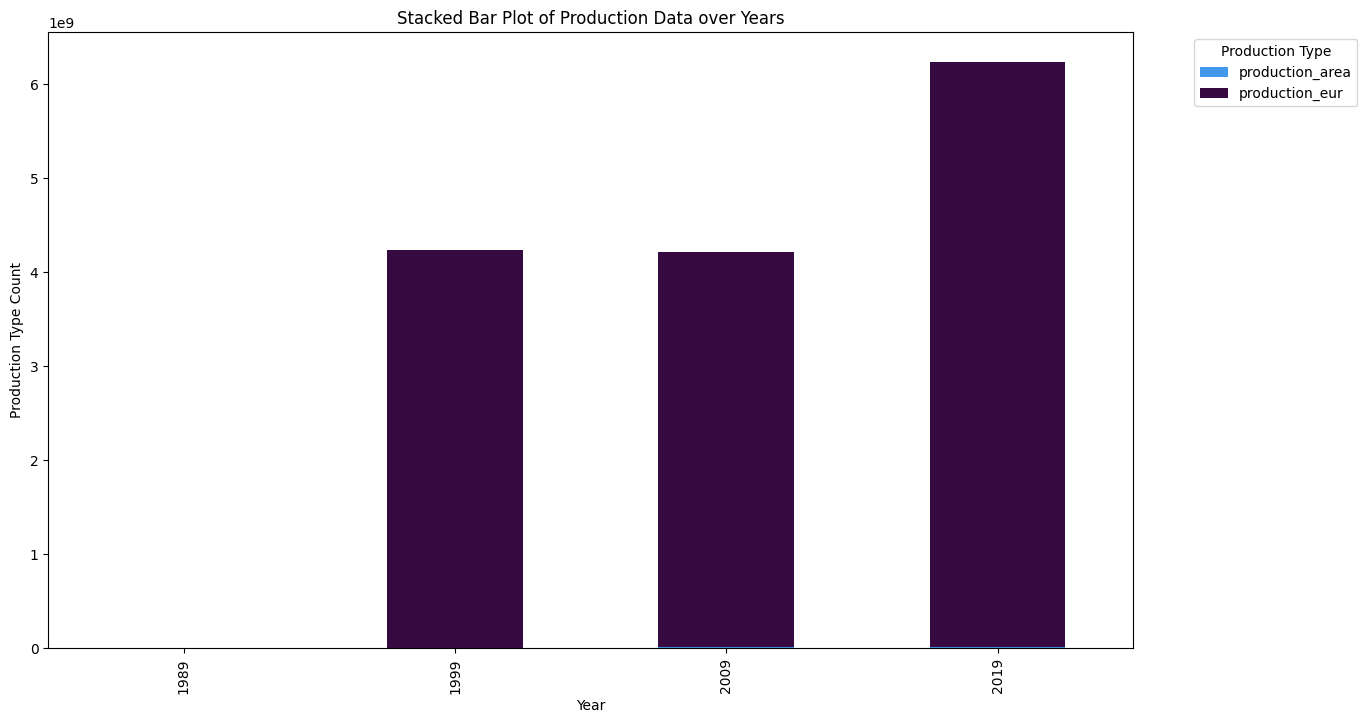

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd



# Aggregate data by year and production type
agg_data = production_melted.groupby(['year', 'production_type']).sum().reset_index()

# Pivot the data for the stacked bar plot
pivot_data = agg_data.pivot(index='year', columns='production_type', values='production_value').fillna(0)

# Plotting the stacked bar plot
def plot_stacked_bar(data):
    data.plot(kind='bar', stacked=True, figsize=(14, 8), color=[np.random.rand(3,) for _ in range(len(data.columns))])
    plt.title('Stacked Bar Plot of Production Data over Years')
    plt.xlabel('Year')
    plt.ylabel('Production Type Count')
    plt.legend(title='Production Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_stacked_bar(pivot_data)

## permanent and temporary crop holdings over time bar plots ##

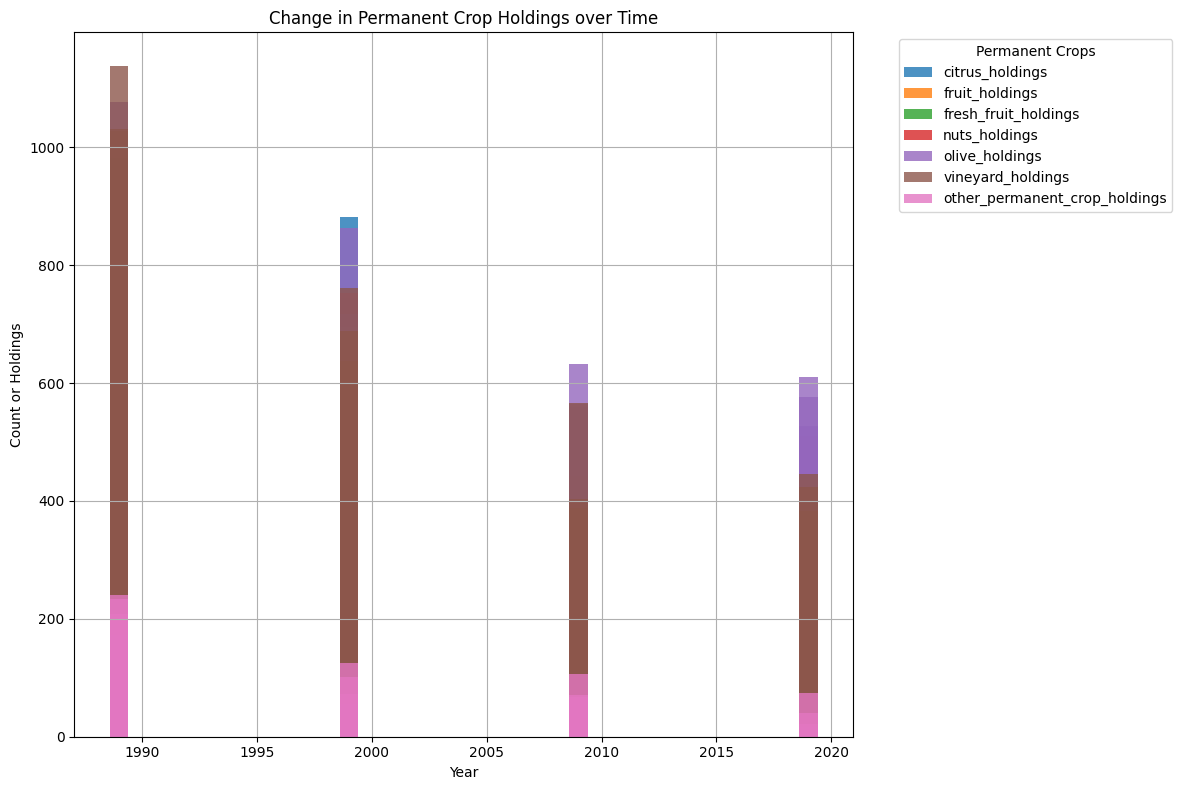

In [37]:
import matplotlib.pyplot as plt
import pandas as pd



# Define permanent crop columns of interest
permanent_crops = ['citrus_holdings', 'fruit_holdings', 'fresh_fruit_holdings', 'nuts_holdings', 
                   'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

# Plotting each column as a bar plot over time (year)
plt.figure(figsize=(12, 8))
for column in permanent_crops:
    plt.bar(data['year'], data[column], label=column, alpha=0.8)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Count or Holdings')
plt.title('Change in Permanent Crop Holdings over Time')
plt.legend(title='Permanent Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


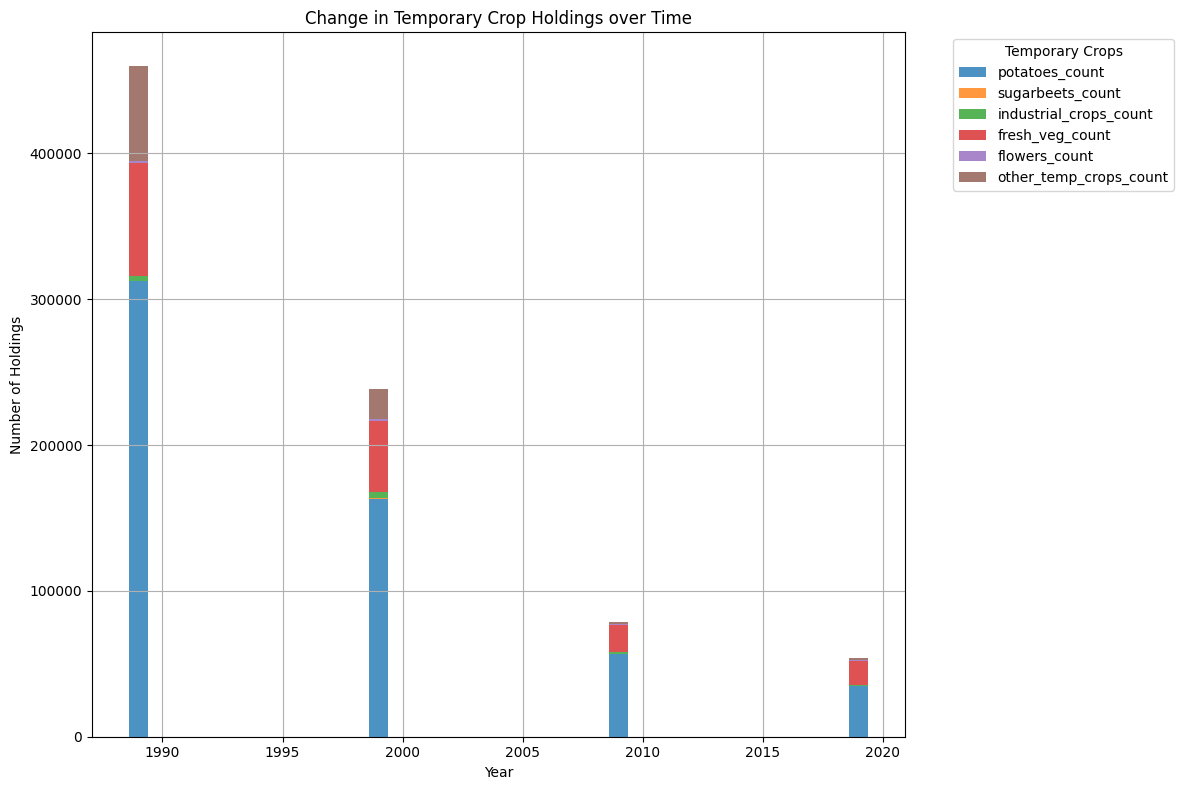

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example data (replace with your actual data)
# data = pd.DataFrame({
#     'year': np.random.choice([1989, 1999, 2009, 2019], size=100),
#     'potatoes_count': np.random.randint(0, 100, size=100),
#     'sugarbeets_count': np.random.randint(0, 100, size=100),
#     'industrial_crops_count': np.random.randint(0, 100, size=100),
#     'fresh_veg_count': np.random.randint(0, 100, size=100),
#     'flowers_count': np.random.randint(0, 100, size=100),
#     'other_temp_crops_count': np.random.randint(0, 100, size=100)
# })

# Define temporary crop columns of interest
temporary_crops = ['potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                   'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Aggregate data by year
agg_data = data.groupby('year')[temporary_crops].sum().reset_index()

# Plotting stacked bar plot for each year
plt.figure(figsize=(12, 8))
bottom = np.zeros(len(agg_data['year']))  # Initialize the bottom values for stacking bars

for i, crop in enumerate(temporary_crops):
    plt.bar(agg_data['year'], agg_data[crop], label=crop, alpha=0.8, bottom=bottom)
    bottom += agg_data[crop]  # Update the bottom values for the next stacked bar

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Number of Holdings')
plt.title('Change in Temporary Crop Holdings over Time')
plt.legend(title='Temporary Crops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


## Edu changes over time ##

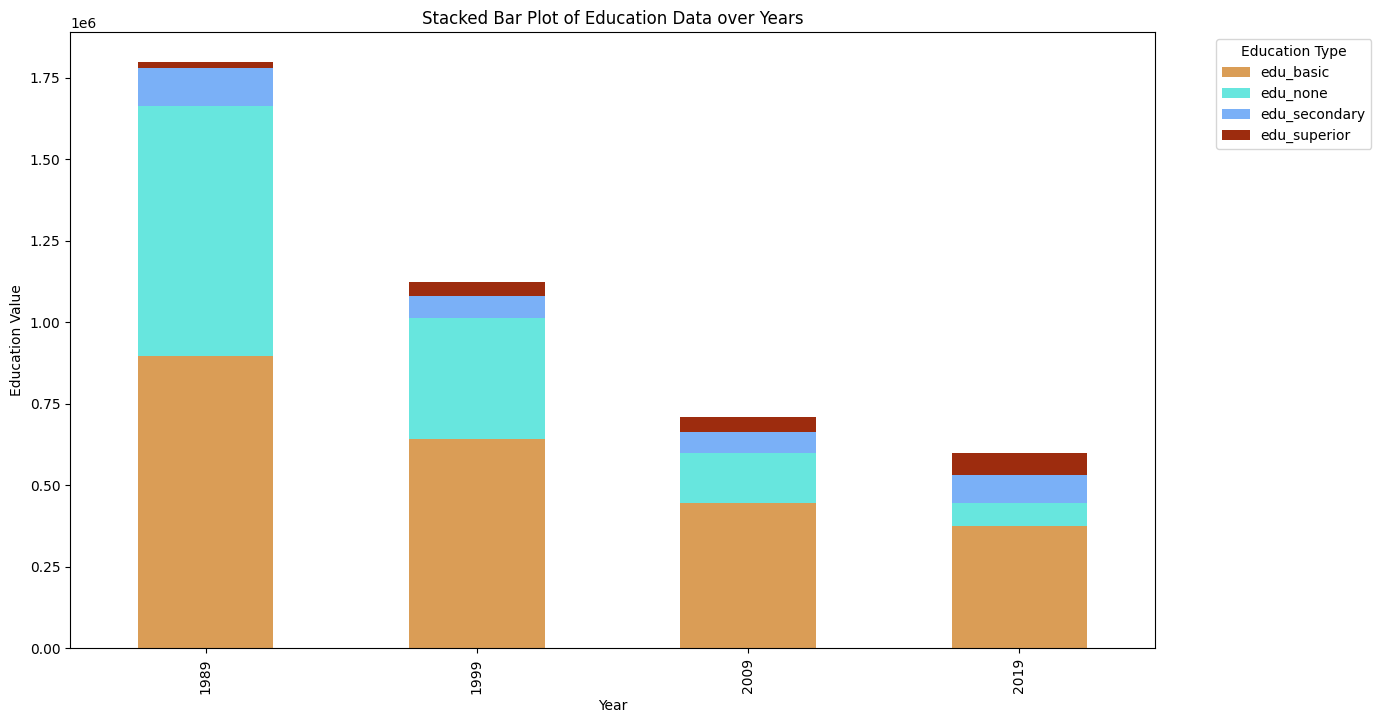

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Example data
# edu_melted = pd.DataFrame({
#     'year': np.random.choice([1989, 1999, 2009, 2019], size=100),
#     'edu_value': np.random.rand(100) * 100,
#     'edu_type': np.random.choice(['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior'], size=100)
# })

# Aggregate data by year and education type
agg_data = edu_melted.groupby(['year', 'edu_type']).sum().reset_index()

# Pivot the data for the stacked bar plot
pivot_data = agg_data.pivot(index='year', columns='edu_type', values='edu_value').fillna(0)

# Plotting the stacked bar plot
def plot_stacked_bar(data):
    data.plot(kind='bar', stacked=True, figsize=(14, 8), color=[np.random.rand(3,) for _ in range(len(data.columns))])
    plt.title('Stacked Bar Plot of Education Data over Years')
    plt.xlabel('Year')
    plt.ylabel('Education Value')
    plt.legend(title='Education Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

plot_stacked_bar(pivot_data)


## doing the same thing but for labour and production value

In [35]:
import pandas as pd

# Display the first few rows of the DataFrame
df.head()

# Melt the labour columns to long format
labour_long = df.melt(id_vars=['region_name', 'year'], value_vars=labour_columns, 
                      var_name='labour_type', value_name='labour_count')

# Filter the production data for the years 1999, 2009, 2019
production_long = df[df['year'].isin([1999, 2009, 2019])][['region_name', 'year'] + production_columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


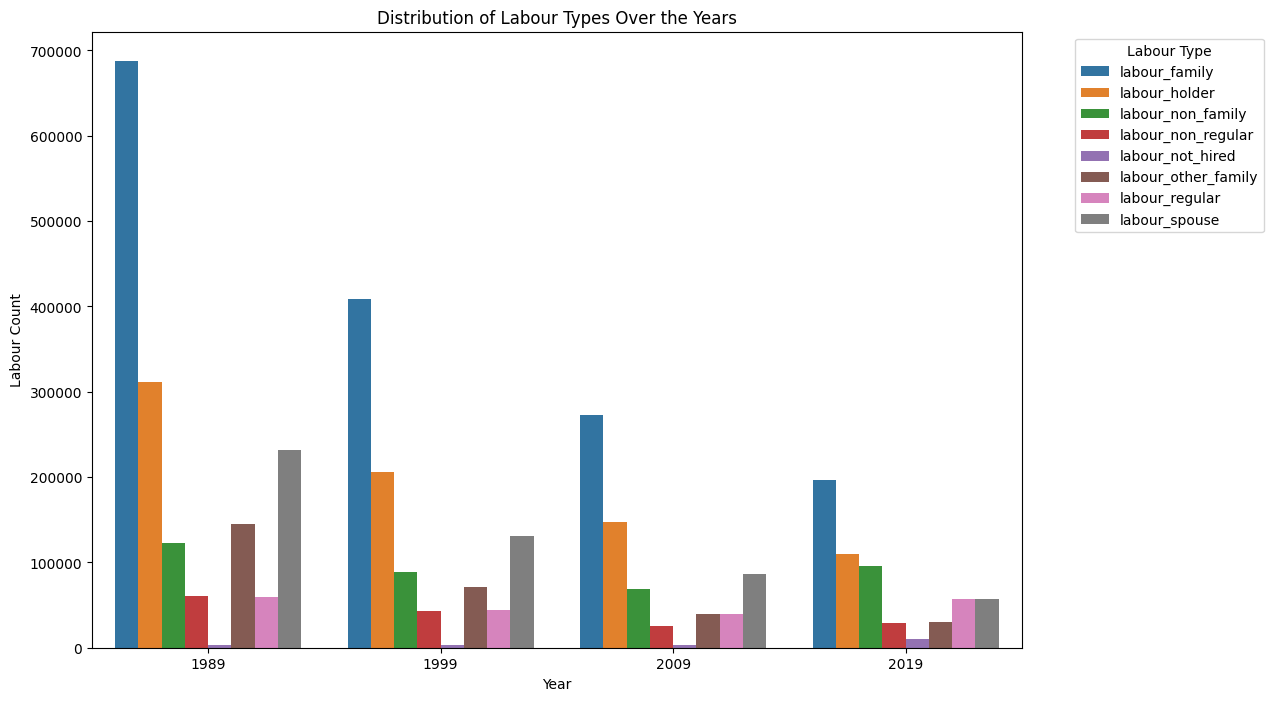

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate labour data by year and labour_type
labour_agg = labour_long.groupby(['year', 'labour_type']).sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=labour_agg, x='year', y='labour_count', hue='labour_type')
plt.title('Distribution of Labour Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Labour Count')
plt.legend(title='Labour Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [56]:
##bar plot w labour and production

# Melt the labour columns to long format
labour_long = df.melt(id_vars=['region_name', 'year'], value_vars=labour_columns, 
                      var_name='labour_type', value_name='labour_count')

# Filter the production data for the years 1999, 2009, 2019
production_long = df[df['year'].isin([1999, 2009, 2019])][['region_name', 'year'] + production_columns]

# Pivot labour_long to get the labour columns back
labour_pivot = labour_long.pivot_table(index=['region_name', 'year'], columns='labour_type', values='labour_count').reset_index()
labour_pivot.columns.name = None  # Remove categories name

# Merge the labour and production data
merged_data = pd.merge(labour_pivot, production_long, on=['region_name', 'year'])

# Aggregate data by year
aggregated_data = merged_data.groupby('year')[labour_columns + ['production_eur']].sum().reset_index()


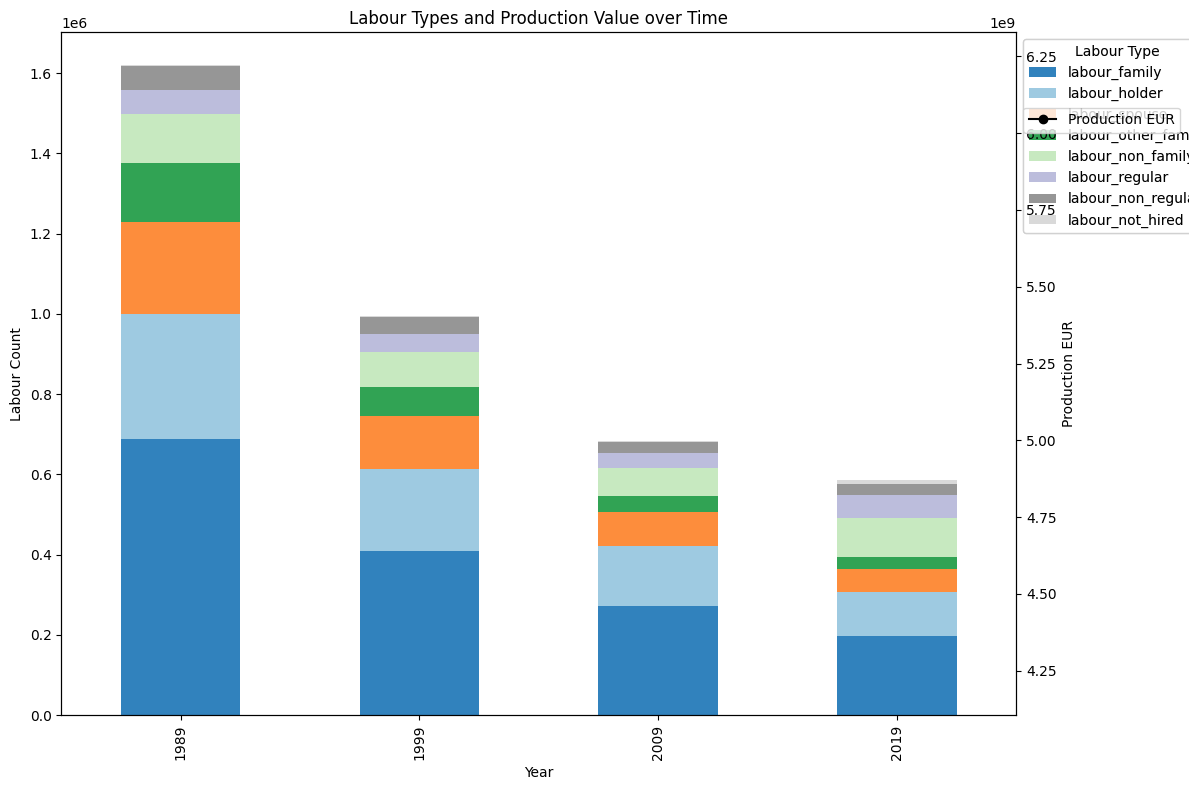

In [57]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create stacked bar plot for labour types
labour_summary.set_index('year').plot(kind='bar', stacked=True, ax=ax1, colormap='tab20c')

# Plot production value as a line plot on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(production_summary['year'], production_summary['production_eur'], color='black', marker='o', linestyle='-', label='Production EUR')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Labour Count')
ax2.set_ylabel('Production EUR')
ax1.set_title('Labour Types and Production Value over Time')

# Adding legends
labour_legend = ax1.legend(title='Labour Type', loc='upper left', bbox_to_anchor=(1,1))
production_legend = ax2.legend(loc='upper left', bbox_to_anchor=(1,0.9))
ax1.add_artist(labour_legend)

plt.tight_layout()
plt.show()


In [58]:

# Summarize labour counts by year for each labour type
labour_summary = df.groupby('year')[labour_columns].sum().reset_index()

# Summarize production value by year
production_summary = df[df['year'].isin([1999, 2009, 2019])].groupby('year')['production_eur'].sum().reset_index()


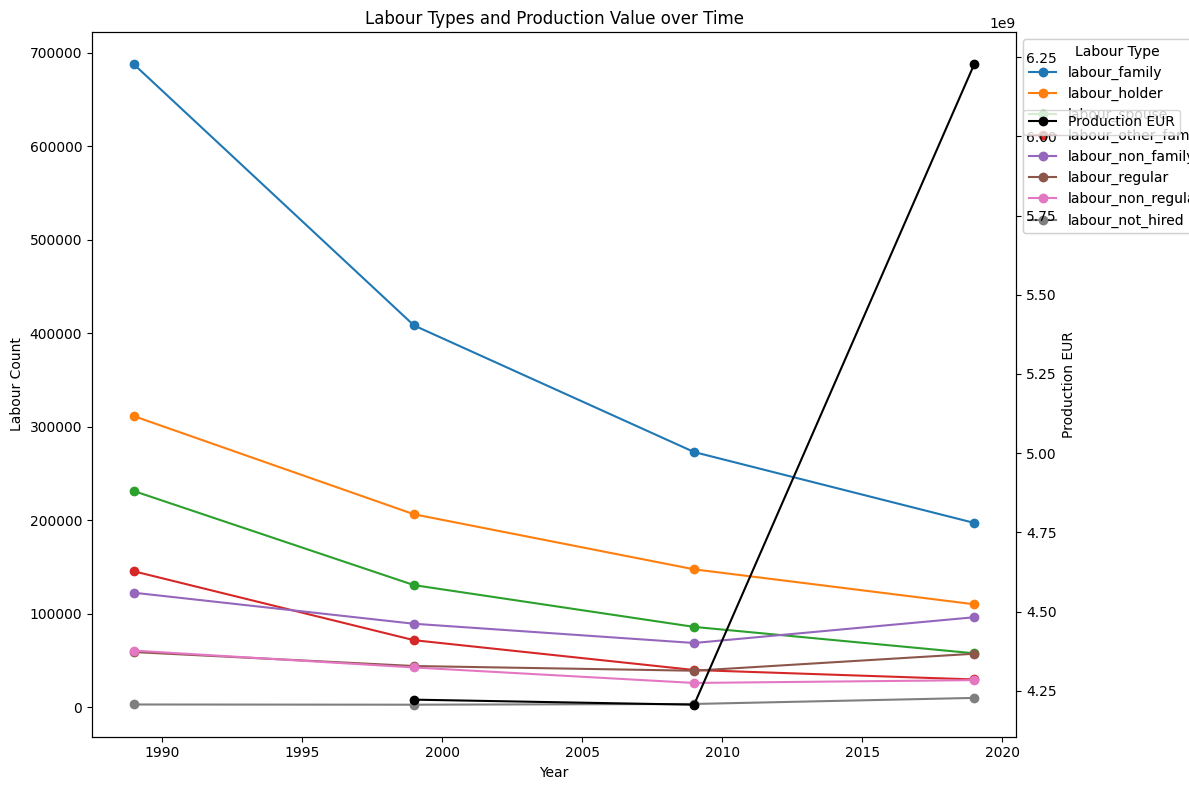

In [59]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Create line plots for labour types
for labour_type in labour_columns:
    ax1.plot(labour_summary['year'], labour_summary[labour_type], marker='o', linestyle='-', label=labour_type)

# Plot production value as a line plot on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(production_summary['year'], production_summary['production_eur'], color='black', marker='o', linestyle='-', label='Production EUR')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Labour Count')
ax2.set_ylabel('Production EUR')
ax1.set_title('Labour Types and Production Value over Time')

# Adding legends
labour_legend = ax1.legend(title='Labour Type', loc='upper left', bbox_to_anchor=(1,1))
production_legend = ax2.legend(['Production EUR'], loc='upper left', bbox_to_anchor=(1,0.9))
ax1.add_artist(labour_legend)

plt.tight_layout()
plt.show()


In [65]:

# Summarize labour counts by year for each labour type
labour_summary = df.groupby('year')[labour_columns].sum().reset_index()

# Summarize production value by year
production_summary = df.groupby('year')[['production_eur']].sum().reset_index()


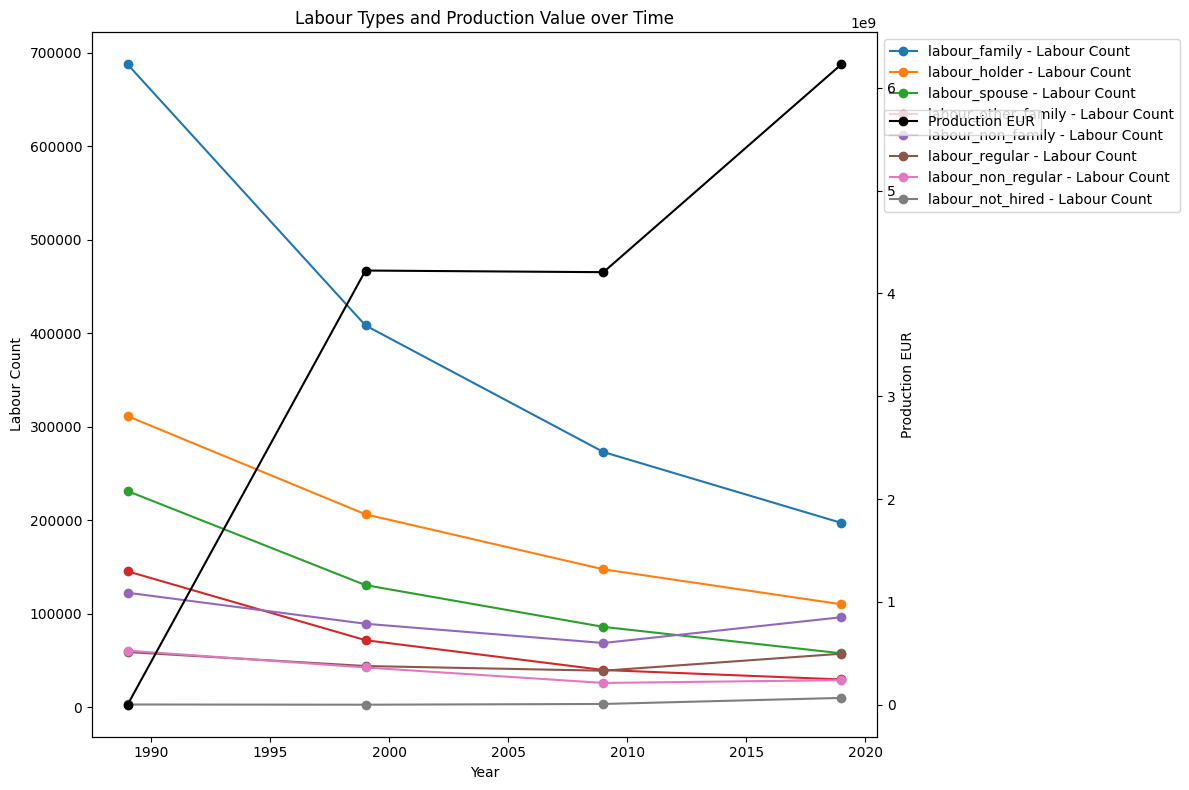

In [66]:
# Set the figure size
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot production values for each labour type
for labour_type in labour_columns:
    ax1.plot(production_summary['year'], labour_summary[labour_type], marker='o', linestyle='-', label=f'{labour_type} - Labour Count')

# Plot production value as a line plot on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(production_summary['year'], production_summary['production_eur'], color='black', marker='o', linestyle='-', label='Production EUR')

# Adding labels and title
ax1.set_xlabel('Year')
ax1.set_ylabel('Labour Count')
ax2.set_ylabel('Production EUR')
ax1.set_title('Labour Types and Production Value over Time')

# Adding legends
labour_legend = ax1.legend(loc='upper left', bbox_to_anchor=(1,1))
production_legend = ax2.legend(['Production EUR'], loc='upper left', bbox_to_anchor=(1,0.9))

plt.tight_layout()
plt.show()


## regression of labour type and production value

## is the labour and production data even related??

In [76]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming your data is loaded into a DataFrame 'df'
# Example columns: labour_family, labour_holder, ..., production_eur, production_area

# Dictionary to store results
results = {}

# Perform Chi-square tests for each labour type
for labour_type in labour_columns:
    # Create contingency table
    contingency_table = pd.crosstab(df[labour_type], df['production_eur'])
    
    # Perform Chi-square test of independence
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Store results
    results[labour_type] = {'Chi-square': chi2, 'P-value': p, 'Degrees of Freedom': dof, 'Expected Frequencies': expected}

# Print results
for labour_type, result in results.items():
    print(f"\nChi-square Test Results for {labour_type}:")
    print(f"Chi-square statistic: {result['Chi-square']}")
    print(f"P-value: {result['P-value']}")
    print(f"Degrees of freedom: {result['Degrees of Freedom']}")
    print("Expected frequencies table:")
    print(result['Expected Frequencies'])



Chi-square Test Results for labour_family:
Chi-square statistic: 4308794.342662346
P-value: 0.01739347370733824
Degrees of freedom: 4302600
Expected frequencies table:
[[0.00257491 0.00257491 0.00257491 ... 0.00257491 0.00257491 0.00257491]
 [0.00491573 0.00491573 0.00491573 ... 0.00491573 0.00491573 0.00491573]
 [0.00339419 0.00339419 0.00339419 ... 0.00339419 0.00339419 0.00339419]
 ...
 [0.00011704 0.00011704 0.00011704 ... 0.00011704 0.00011704 0.00011704]
 [0.00011704 0.00011704 0.00011704 ... 0.00011704 0.00011704 0.00011704]
 [0.00011704 0.00011704 0.00011704 ... 0.00011704 0.00011704 0.00011704]]

Chi-square Test Results for labour_holder:
Chi-square statistic: 2525857.295157886
P-value: 0.039841512433628434
Degrees of freedom: 2521920
Expected frequencies table:
[[0.00374532 0.00374532 0.00374532 ... 0.00374532 0.00374532 0.00374532]
 [0.00690543 0.00690543 0.00690543 ... 0.00690543 0.00690543 0.00690543]
 [0.00620318 0.00620318 0.00620318 ... 0.00620318 0.00620318 0.00620318

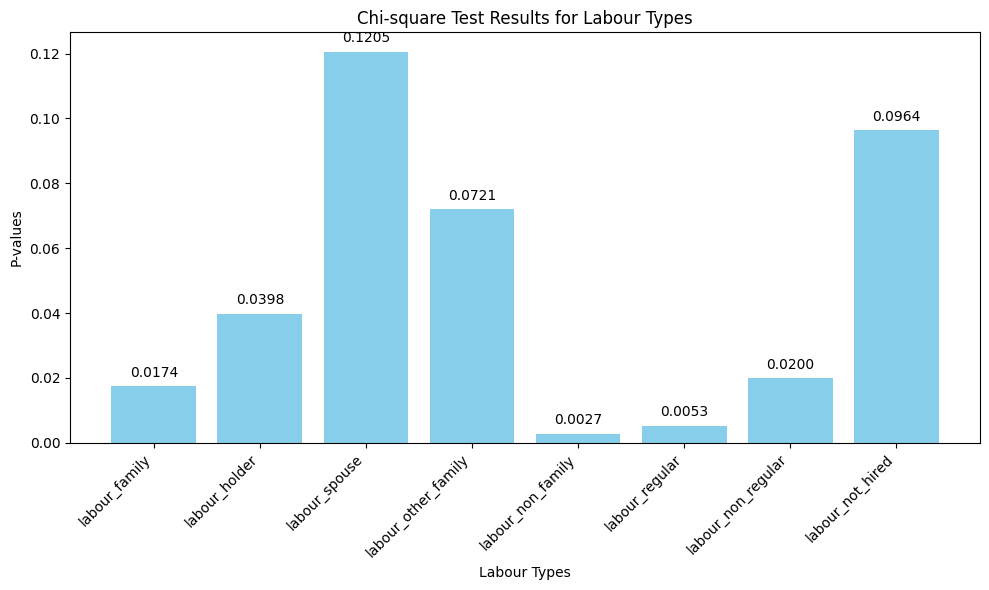

In [80]:
import matplotlib.pyplot as plt

# Define labour types and their corresponding p-values
labour_types = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
p_values = [0.01739347370733824, 0.039841512433628434, 0.12053936327941568, 0.07206645133236242,
            0.002731556845629176, 0.0053165581659457084, 0.019964013884513212, 0.0963802602500706]

# Set the figure size
plt.figure(figsize=(10, 6))

# Create bar chart
bars = plt.bar(labour_types, p_values, color='skyblue')

# Add labels and title
plt.xlabel('Labour Types')
plt.ylabel('P-values')
plt.title('Chi-square Test Results for Labour Types')

# Add p-values above bars
for bar, p_value in zip(bars, p_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.002, f'{p_value:.4f}', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [77]:
from scipy.stats import spearmanr

# Dictionary to store correlation results
correlation_results = {}

# Perform Spearman rank correlation for each labour type with production_eur
for labour_type in labour_columns:
    # Compute Spearman rank correlation
    spearman_corr, p_value = spearmanr(df[labour_type], df['production_eur'], nan_policy='omit')
    
    # Store results
    correlation_results[labour_type] = {'Spearman correlation': spearman_corr, 'P-value': p_value}

# Print results
for labour_type, result in correlation_results.items():
    print(f"\nSpearman Rank Correlation Results for {labour_type}:")
    print(f"Spearman correlation coefficient: {result['Spearman correlation']}")
    print(f"P-value: {result['P-value']}")



Spearman Rank Correlation Results for labour_family:
Spearman correlation coefficient: 0.501690050923405
P-value: 0.0

Spearman Rank Correlation Results for labour_holder:
Spearman correlation coefficient: 0.5573031980388097
P-value: 0.0

Spearman Rank Correlation Results for labour_spouse:
Spearman correlation coefficient: 0.41471134464192
P-value: 0.0

Spearman Rank Correlation Results for labour_other_family:
Spearman correlation coefficient: 0.3834748103020867
P-value: 2.0908694509397985e-297

Spearman Rank Correlation Results for labour_non_family:
Spearman correlation coefficient: 0.7612501754980343
P-value: 0.0

Spearman Rank Correlation Results for labour_regular:
Spearman correlation coefficient: 0.7192149961378708
P-value: 0.0

Spearman Rank Correlation Results for labour_non_regular:
Spearman correlation coefficient: 0.578011599988729
P-value: 0.0

Spearman Rank Correlation Results for labour_not_hired:
Spearman correlation coefficient: 0.6324281087250649
P-value: 0.0


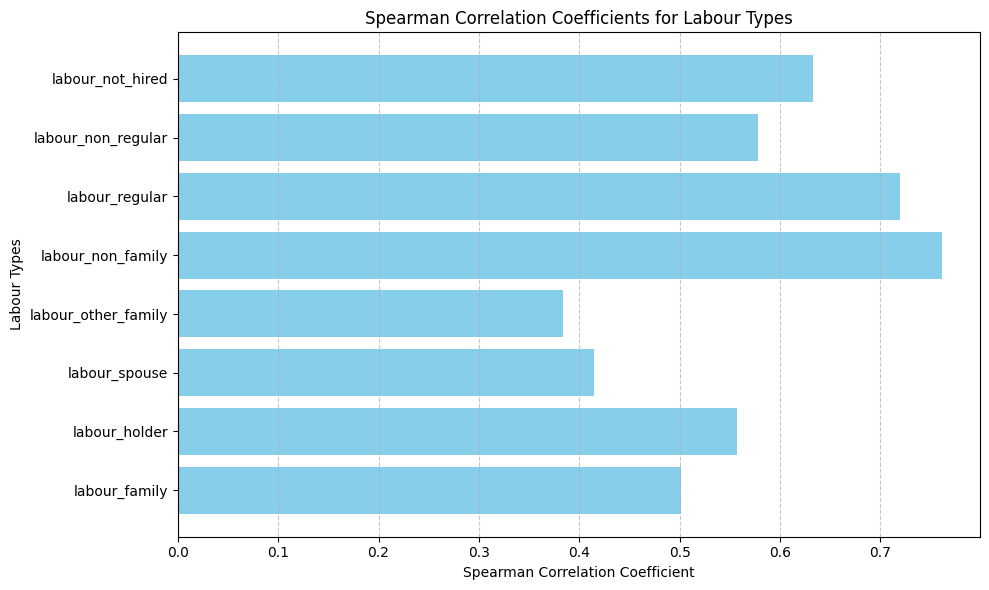

In [82]:
import matplotlib.pyplot as plt

# Define labour types and their corresponding correlation coefficients
labour_types = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired']
correlation_coefficients = [0.501690050923405, 0.5573031980388097, 0.41471134464192, 0.3834748103020867,
                            0.7612501754980343, 0.7192149961378708, 0.578011599988729, 0.6324281087250649]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the correlation coefficients as a bar graph
plt.barh(labour_types, correlation_coefficients, color='skyblue')

# Add labels and title
plt.xlabel('Spearman Correlation Coefficient')
plt.ylabel('Labour Types')
plt.title('Spearman Correlation Coefficients for Labour Types')

# Display the plot
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Add horizontal gridlines for clarity
plt.tight_layout()
plt.show()


In [75]:
from scipy.stats import spearmanr

# Assuming 'labour_count' is an ordinal representation of labour types
# and 'production_eur' is an ordinal representation of production values

# Compute Spearman rank correlation for each labour type with production_eur
correlation_results = {}
for labour_type in labour_columns:
    spearman_corr, p_value = spearmanr(df[labour_type], df['production_eur'])
    correlation_results[labour_type] = {'Spearman correlation': spearman_corr, 'P-value': p_value}

# Print results
for labour_type, result in correlation_results.items():
    print(f"\nSpearman Rank Correlation Results for {labour_type}:")
    print(f"Spearman correlation coefficient: {result['Spearman correlation']}")
    print(f"P-value: {result['P-value']}")



Spearman Rank Correlation Results for labour_family:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_holder:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_spouse:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_other_family:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_non_family:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_regular:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_non_regular:
Spearman correlation coefficient: nan
P-value: nan

Spearman Rank Correlation Results for labour_not_hired:
Spearman correlation coefficient: nan
P-value: nan


**Create a pivot table or maybe a pd merge separating each variable of interest into year**

In [42]:
import pandas as pd

# Load the dataset

# Define columns for agricultural activity and socio-economic indicators
ag_activity_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 
                       'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 
                       'other_permanent_crop_holdings', 'cereals_count', 
                       'dried_pulses_count', 'grasses_count', 'fodder_count', 
                       'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                       'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired', 
                      'production_eur', 'production_area', 'edu_none', 'edu_basic', 
                      'edu_secondary', 'edu_superior']

# Filter dataset to include only relevant columns and years
data_filtered = data[['year'] + ag_activity_columns + socio_econ_columns]
data_filtered = data_filtered[data_filtered['year'].isin([1999, 2009, 2019])]

# Drop rows with null values
data_filtered = data_filtered.dropna()

# Melt the DataFrame to long format for pivoting
data_melted = pd.melt(data_filtered, id_vars=['year'], var_name='indicator', value_name='value')

# Create a new column for the type of indicator (ag_activity or socio_econ)
data_melted['indicator_type'] = data_melted['indicator'].apply(
    lambda x: 'ag_activity' if x in ag_activity_columns else 'socio_econ'
)

# Create a pivot table
pivot_table = data_melted.pivot_table(index=['year', 'indicator'], columns='indicator_type', values='value', aggfunc='sum').reset_index()

# Display the pivot table
pivot_table.head(20)  # Display the first 20 rows for brevity


indicator_type  year               indicator  ag_activity  socio_econ
0               1999           cereals_count     190413.0         NaN
1               1999         citrus_holdings      37651.0         NaN
2               1999      dried_pulses_count      87016.0         NaN
3               1999               edu_basic          NaN    642793.0
4               1999                edu_none          NaN    369030.0
5               1999           edu_secondary          NaN     69385.0
6               1999            edu_superior          NaN     42040.0
7               1999           flowers_count       1744.0         NaN
8               1999            fodder_count     179990.0         NaN
9               1999    fresh_fruit_holdings      61474.0         NaN
10              1999         fresh_veg_count      48600.0         NaN
11              1999          fruit_holdings       1781.0         NaN
12              1999           grasses_count      19531.0         NaN
13              1999  industrial_crops_count       3730.0         NaN
14              1999           labour_family          NaN    408353.0
15              1999           labour_holder          NaN    206366.0
16              1999       labour_non_family          NaN     89273.0
17              1999      labour_non_regular          NaN     42515.0
18              1999        labour_not_hired          NaN      2692.0
19              1999     labour_other_family          NaN     71696.0

2. Analyzing the Relationship Between Variety of Agricultural Practices and Economic Gain (production_eur) and Labor Force
We will calculate the correlation between the variety of agricultural practices, economic gain, and labor force.

In [12]:
# Replace 'area.1' in column names with 'count'
data.columns = [col.replace('area.1', 'count') for col in data.columns]

# Display the updated columns to verify the changes
data.columns.tolist()

# Step 1: Extract the first two digits from the NutsID to create Nuts3ID
data['Nuts3ID'] = data['NutsID'].str[:2]

# Step 2: Map the Nuts3ID to their corresponding Designation values
designation_mapping = {
    '11': 'Norte',
    '16': 'Centro',
    '17': 'Area Metropolitana de Lisboa',
    '18': 'Alentejo',
    '15': 'Algarve'
}
data['Designation'] = data['Nuts3ID'].map(designation_mapping)

# Display the first few rows to verify the new columns
data.head()


NutsID DICOFRE       region_name  year  edu_none  edu_basic  \
0  111160101  160101  Aboim das Chocas  2019        15         61   
1  111160101  160101  Aboim das Chocas  2009        30         57   
2  111160101  160101  Aboim das Chocas  1999        49         73   
3  111160101  160101  Aboim das Chocas  1989       167         97   
4  111160102  160102             Aguia  2019        24         68   

   edu_secondary  edu_superior  labour_family  labour_holder  ...  \
0             11             7             34             15  ...   
1              4             4             50             24  ...   
2              7             6             62             26  ...   
3              4             0            163             70  ...   
4              5             2             70             38  ...   

   other_permanent_crop_area  fresh_fruit_holdings  citrus_holdings  \
0                          0                     0                1   
1                          0                     0                0   
2                          0                     0                0   
3                          0                     0                0   
4                          0                     0                0   

   fruit_holdings  nuts_holdings  olive_holdings  vineyard_holdings  \
0               0              1               0                 32   
1               0              0               0                 29   
2               0              0               0                 40   
3               0              0               1                 84   
4               0              0               2                 39   

   other_permanent_crop_holdings  Nuts3ID  Designation  
0                              0       11        Norte  
1                              0       11        Norte  
2                              0       11        Norte  
3                              0       11        Norte  
4                              0       11        Norte  

[5 rows x 54 columns]

PCA W TEMPORAL PATHWAYS

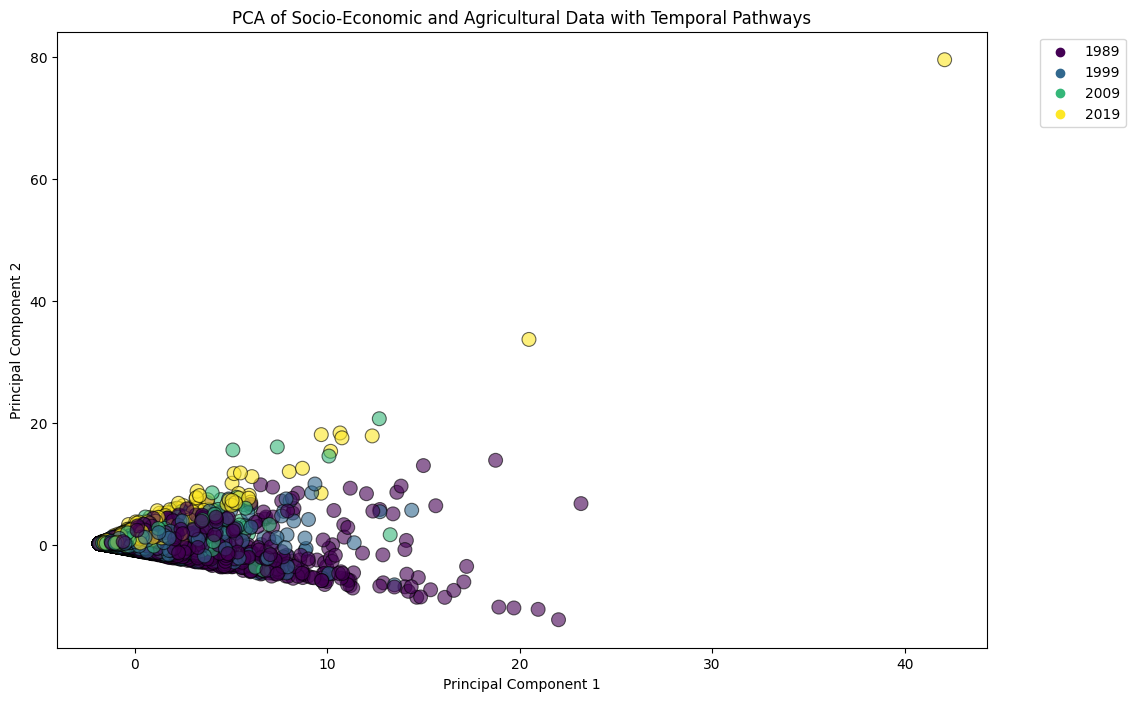

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Select relevant columns for PCA
pca_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired' ] 

# Drop rows with missing values in the selected columns
data_pca = data.dropna(subset=pca_columns) #

# Standardize the data (optional but recommended for PCA)
data_pca_standardized = (data_pca[pca_columns] - data_pca[pca_columns].mean()) / data_pca[pca_columns].std()

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_pca_standardized)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['year'] = data_pca['year']

# Plot PCA results with temporal pathways
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='year', palette='viridis', data=pca_df, s=100, alpha=0.6, edgecolor='k')
plt.title('PCA of Socio-Economic and Agricultural Data with Temporal Pathways')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


time series analysis

goal: Analyze trends over time for selected variables, visualizing temporal changes using line plots.

--needs work


5. Inferential StatisticsWe can perform inferential statistics using methods such as PCA to see the relationships between different variables over time.

/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_3038/1861483413.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_economic.dropna(inplace=True)
/var/folders/nx/dr_pnkkn1yg156jk80s020sc0000gn/T/ipykernel_3038/1861483413.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_agriculture.dropna(inplace=True)


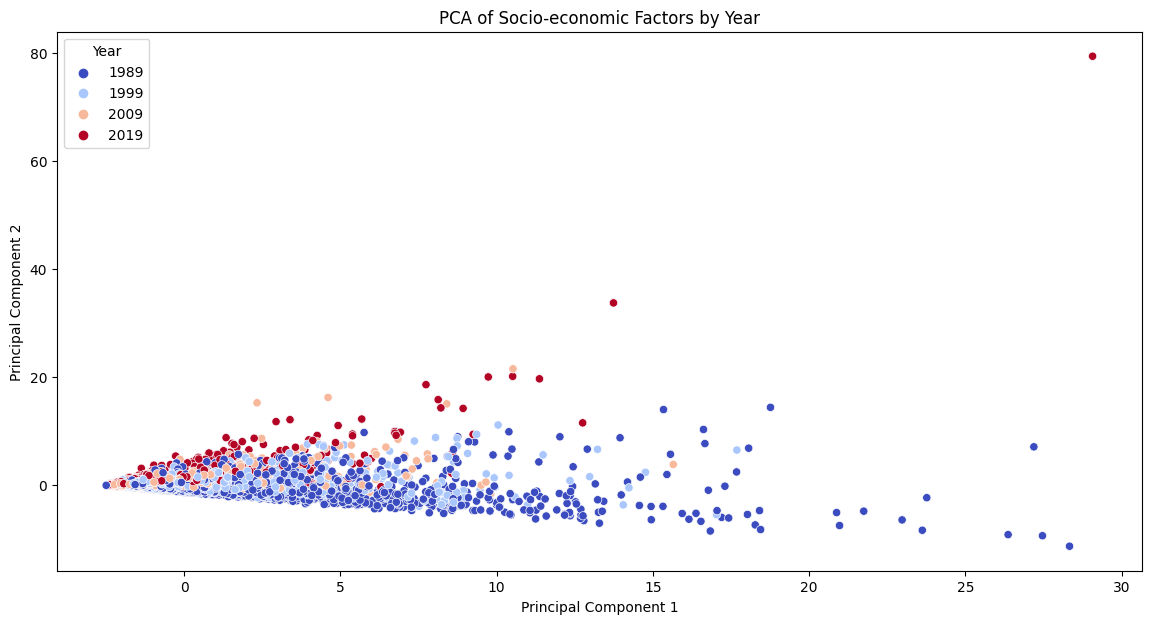

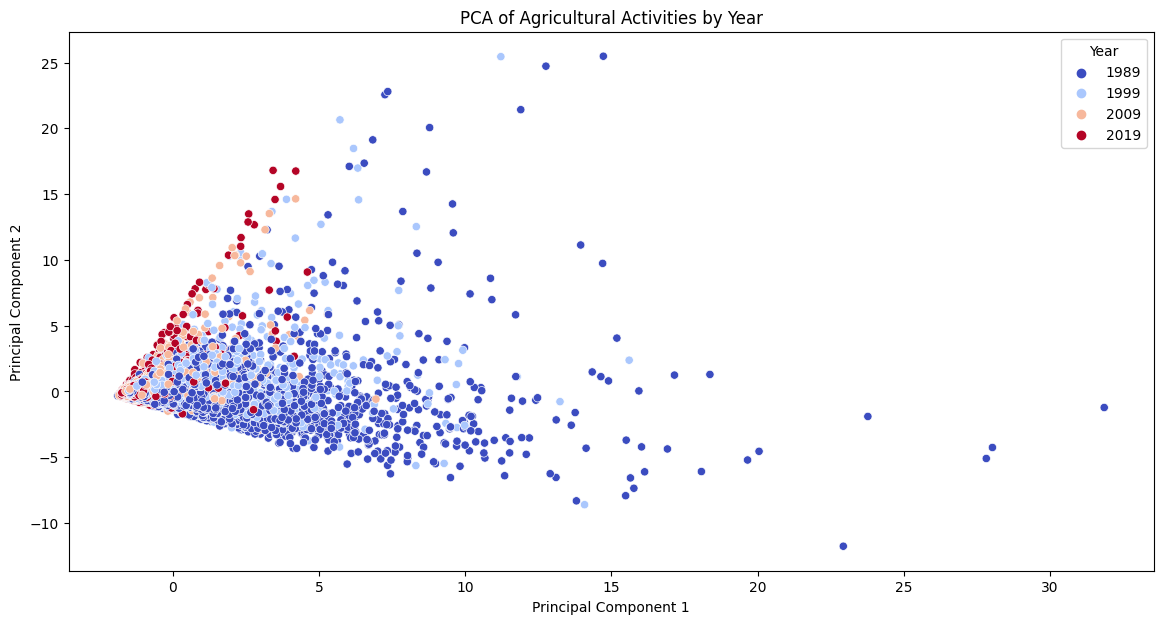

In [51]:
df_merged = data
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_merged is already loaded and organized

# Identify relevant numerical columns for PCA in socio-economic factors
economic_numeric_cols = ['edu_none', 'edu_basic', 'edu_secondary', 'edu_superior',
                         'labour_family', 'labour_holder', 'labour_spouse',
                         'labour_other_family', 'labour_non_family',
                         'labour_regular', 'labour_non_regular', 'labour_not_hired']

# Extract socio-economic factor features and year column
X_economic = df_merged[economic_numeric_cols]
y_economic = df_merged['year']

# Identify relevant numerical columns for PCA in agricultural activities
agriculture_numeric_cols = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 
                       'nuts_holdings', 'olive_holdings', 'vineyard_holdings', 
                       'other_permanent_crop_holdings', 'cereals_count', 
                       'dried_pulses_count', 'grasses_count', 'fodder_count', 
                       'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                       'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

# Extract agricultural activity features and year column
X_agriculture = df_merged[agriculture_numeric_cols]
y_agriculture = df_merged['year']

# Drop rows containing NaN values for socio-economic factors
X_economic.dropna(inplace=True)

# Drop corresponding rows in y for socio-economic factors
y_economic = y_economic[X_economic.index]

# Drop rows containing NaN values for agricultural activities
X_agriculture.dropna(inplace=True)

# Drop corresponding rows in y for agricultural activities
y_agriculture = y_agriculture[X_agriculture.index]

# Standardize the data for socio-economic factors
scaler_economic = StandardScaler()
X_economic_scaled = scaler_economic.fit_transform(X_economic)

# Standardize the data for agricultural activities
scaler_agriculture = StandardScaler()
X_agriculture_scaled = scaler_agriculture.fit_transform(X_agriculture)

# PCA for socio-economic factors
pca_economic = PCA(n_components=2)
economic_principal_components = pca_economic.fit_transform(X_economic_scaled)
economic_pc_df = pd.DataFrame(data=economic_principal_components, columns=['PC1', 'PC2'])
economic_pc_df['Year'] = y_economic.values

# PCA for agricultural activities
pca_agriculture = PCA(n_components=2)
agriculture_principal_components = pca_agriculture.fit_transform(X_agriculture_scaled)
agriculture_pc_df = pd.DataFrame(data=agriculture_principal_components, columns=['PC1', 'PC2'])
agriculture_pc_df['Year'] = y_agriculture.values

# Plotting PCA results for socio-economic factors
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Year', palette='coolwarm', data=economic_pc_df)
plt.title('PCA of Socio-economic Factors by Year')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plotting PCA results for agricultural activities
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Year', palette='coolwarm', data=agriculture_pc_df)
plt.title('PCA of Agricultural Activities by Year')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


#consider doing a discriminate analysis, just to see which socio-econ parameters are separating the groups the best (in this case the years)

In [56]:
import plotly.express as px

def plot_pca_with_loading_interactive(pca, pc_df, loadings_df, title):
    fig = px.scatter(pc_df, x='PC1', y='PC2', color='Year', title=title,
                     hover_data={'PC1': False, 'PC2': False, 'Year': True})

    # Add arrows for loadings
    arrow_scale = 1.0  # Adjust arrow scaling factor

    for i, feature in enumerate(loadings_df.index):
        fig.add_annotation(x=0, y=0, ax=loadings_df.loc[feature, 'PC1'] * arrow_scale,
                           ay=loadings_df.loc[feature, 'PC2'] * arrow_scale,
                           arrowhead=2, arrowsize=1, arrowwidth=2, arrowcolor='red',
                           text=feature, showarrow=True)

    fig.show()

# Example usage:
plot_pca_with_loading_interactive(pca_economic, economic_pc_df, economic_loadings_df, 'PCA of Socio-economic Factors by Year')
plot_pca_with_loading_interactive(pca_agriculture, agriculture_pc_df, agriculture_loadings_df, 'PCA of Agricultural Activities by Year')


In [ ]:
# consider extracting coordinates of samples (PC1 and PC2 and try to correlate)

## the same analysis but split by years 1989 and 2019

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Define columns for temporary crops, permanent crops, and socio-economic factors
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = ['year', 'region_name', 'production_eur'] + temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the predictors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
predictor_columns = temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered[predictor_columns] = scaler.fit_transform(data_filtered[predictor_columns])

# Separate data for 1989 and 2019
data_1999 = data_filtered[data_filtered['year'] == 1999].copy()
data_2019 = data_filtered[data_filtered['year'] == 2019].copy()

# Perform multiple linear regression for 1989
X_1999 = sm.add_constant(data_1999[predictor_columns])
model_1999 = sm.OLS(data_1999['production_eur'], X_1989)
results_1999 = model_1999.fit()

# Perform multiple linear regression for 2019
X_2019 = sm.add_constant(data_2019[predictor_columns])
model_2019 = sm.OLS(data_2019['production_eur'], X_2019)
results_2019 = model_2019.fit()

# Extract coefficients for visualization
coefficients_1999 = results_1999.params.drop('const')
coefficients_2019 = results_2019.params.drop('const')

# Plotting coefficients for 1989
plt.figure(figsize=(12, 8))
plt.bar(coefficients_1989.index, coefficients_1989.values, color='blue')
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients of Variables for Production EUR (1989)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting coefficients for 2019
plt.figure(figsize=(12, 8))
plt.bar(coefficients_2019.index, coefficients_2019.values, color='green')
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.title('Coefficients of Variables for Production EUR (2019)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Display regression summary for interpretation
print("Regression Summary for 1989:")
print(results_1999.summary())

print("\nRegression Summary for 2019:")
print(results_2019.summary())


NameError: name 'data' is not defined

In [1]:
# Add interaction terms with year
for col in predictor_columns:
    data_filtered[f'{col}_year'] = data_filtered[col] * data_filtered['year']


NameError: name 'predictor_columns' is not defined

In [69]:
import statsmodels.api as sm
from statsmodels.regression.mixed_linear_model import MixedLM

# Define the response variable and the predictors including interaction terms
response_variable = data_filtered['production_eur']
interaction_columns = [f'{col}_year' for col in predictor_columns]
predictors = sm.add_constant(data_filtered[predictor_columns + interaction_columns])

# Fit the mixed linear model with region as a random effect
model = MixedLM(response_variable, predictors, groups=data_filtered['region_name'])
result = model.fit()

# Print the model summary
print(result.summary())


                                     Mixed Linear Model Regression Results
Model:                             MixedLM                Dependent Variable:                production_eur    
No. Observations:                  8544                   Method:                            REML              
No. Groups:                        2694                   Scale:                             2031252462485.5269
Min. group size:                   1                      Log-Likelihood:                    -134165.5540      
Max. group size:                   18                     Converged:                         Yes               
Mean group size:                   3.2                                                                         
---------------------------------------------------------------------------------------------------------------
                                         Coef.          Std.Err.      z    P>|z|      [0.025         0.975]    
-----------------------------

In [70]:
# Extract significant variables based on a significance level (e.g., P < 0.05)
significant_vars = result.pvalues[result.pvalues < 0.05].index.tolist()

print("Most significant variables:")
print(significant_vars)

Most significant variables:
['const', 'cereals_count', 'grasses_count', 'fodder_count', 'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 'other_temp_crops_count', 'fresh_fruit_holdings', 'citrus_holdings', 'vineyard_holdings', 'edu_none', 'edu_superior', 'cereals_count_year', 'grasses_count_year', 'fodder_count_year', 'potatoes_count_year', 'sugarbeets_count_year', 'industrial_crops_count_year', 'fresh_veg_count_year', 'other_temp_crops_count_year', 'fresh_fruit_holdings_year', 'citrus_holdings_year', 'vineyard_holdings_year', 'edu_none_year', 'edu_superior_year', 'Group Var']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_filtered' contains your preprocessed dataset with necessary columns

# Extract significant variables
significant_vars = ['cereals_count', 'grasses_count', 'fodder_count', 'potatoes_count', 
                    'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 
                    'other_temp_crops_count', 'fresh_fruit_holdings', 'citrus_holdings', 
                    'vineyard_holdings', 'edu_none', 'edu_superior']

# Prepare data for plotting
data_plot = data_filtered[['year', 'production_eur'] + significant_vars]


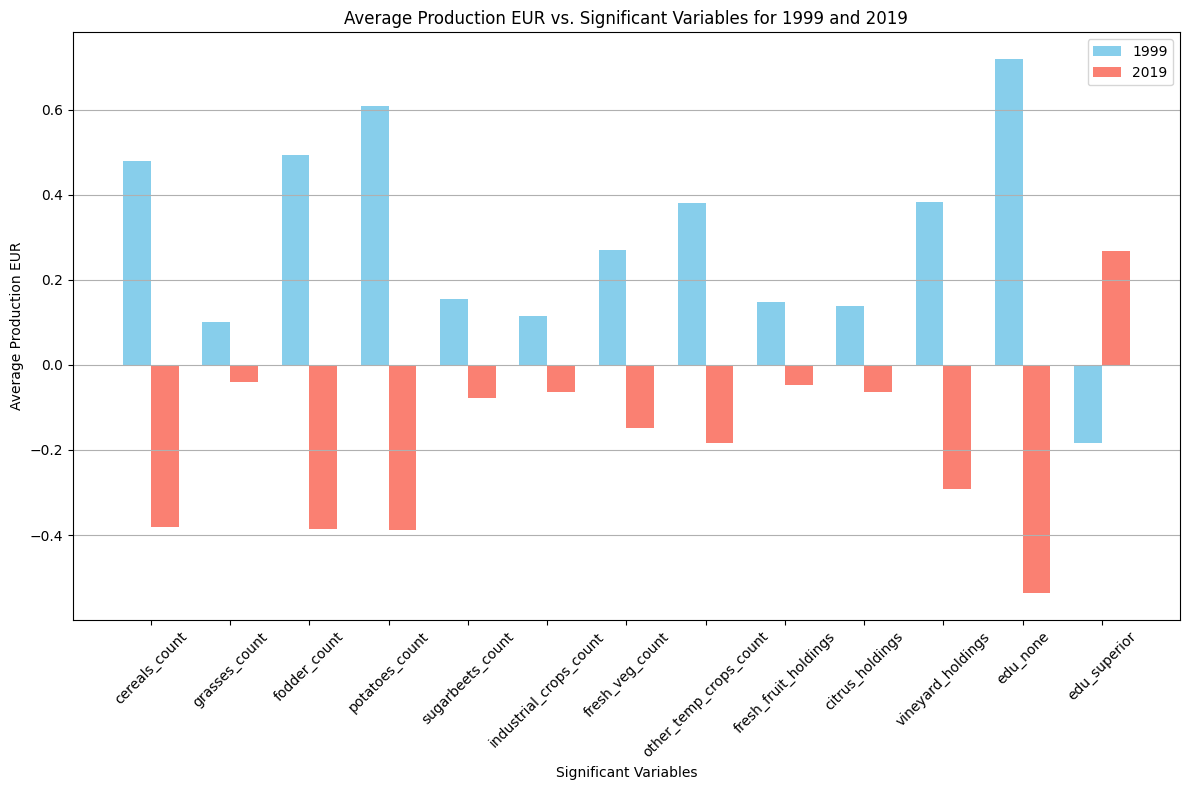

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'data_filtered' contains your preprocessed dataset with necessary columns

# Extract significant variables
significant_vars = ['cereals_count', 'grasses_count', 'fodder_count', 'potatoes_count', 
                    'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count', 
                    'other_temp_crops_count', 'fresh_fruit_holdings', 'citrus_holdings', 
                    'vineyard_holdings', 'edu_none', 'edu_superior']

# Filter data for years 1999 and 2019
data_1999 = data_filtered[data_filtered['year'] == 1999]
data_2019 = data_filtered[data_filtered['year'] == 2019]

# Calculate average values for each year
avg_values_1999 = data_1999[significant_vars].mean()
avg_values_2019 = data_2019[significant_vars].mean()

# Plotting as a grouped bar plot
fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(significant_vars))

bar_1999 = ax.bar(index, avg_values_1999, bar_width, label='1999', color='skyblue')
bar_2019 = ax.bar([i + bar_width for i in index], avg_values_2019, bar_width, label='2019', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Significant Variables')
ax.set_ylabel('Average Production EUR')
ax.set_title('Average Production EUR vs. Significant Variables for 1999 and 2019')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(significant_vars, rotation=45)
ax.legend()

# Display grid
ax.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


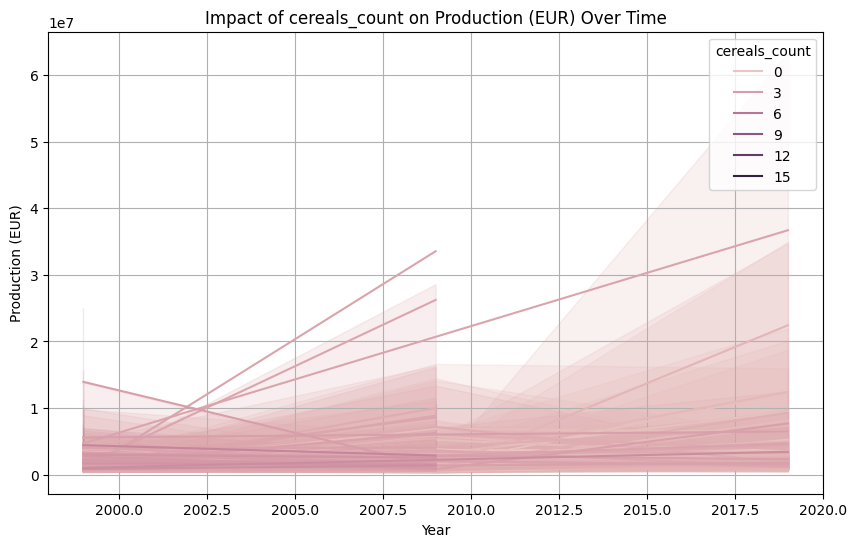

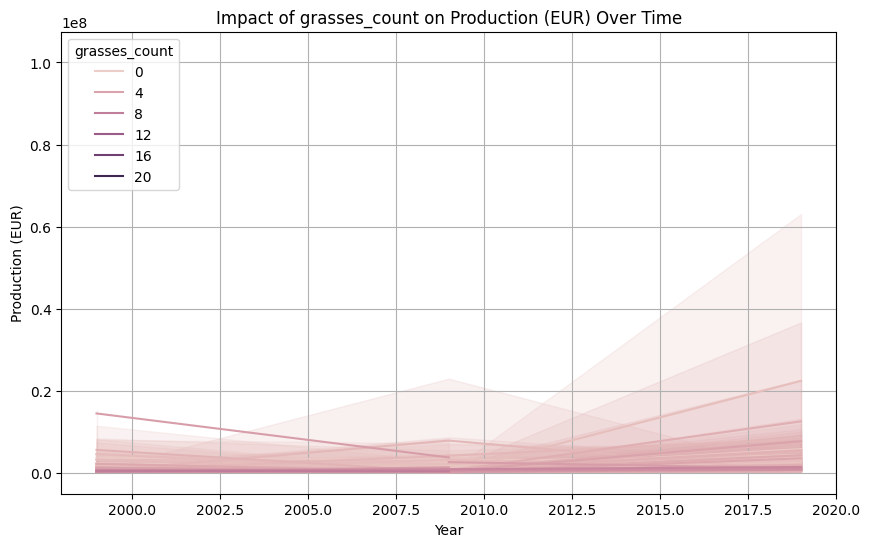

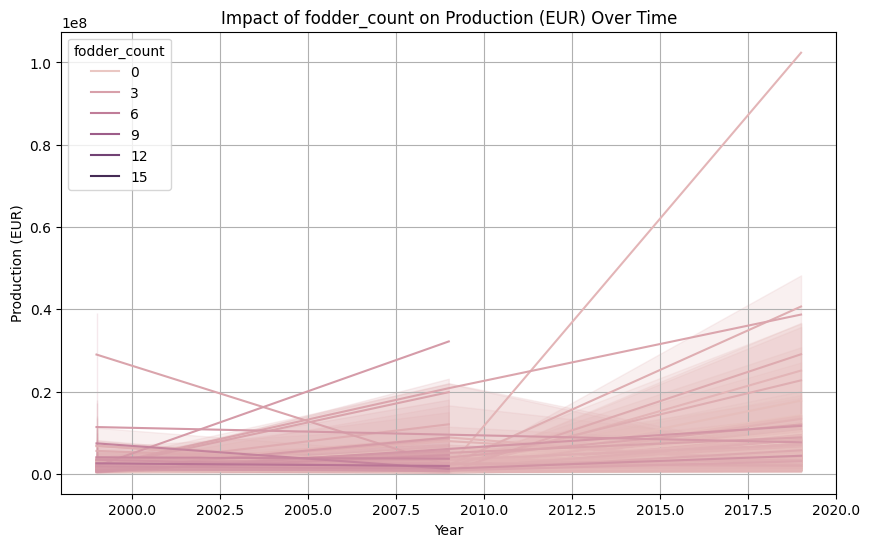

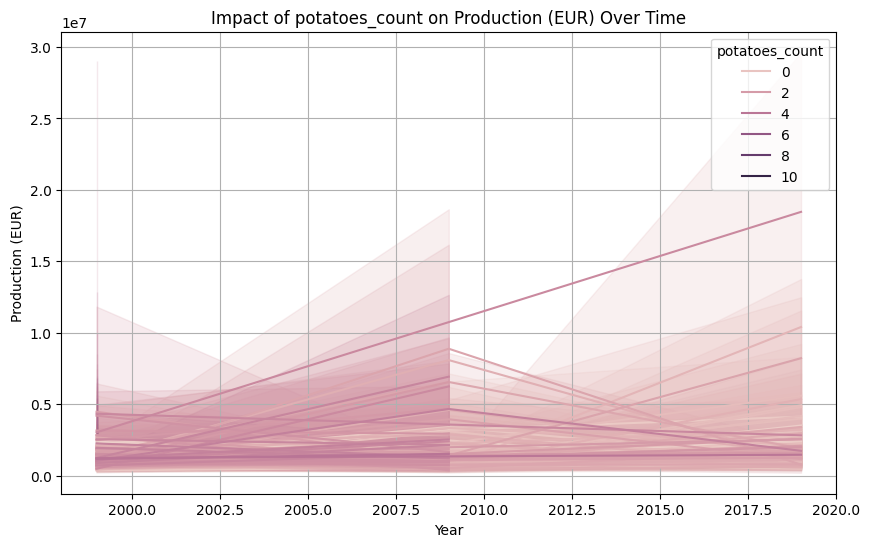

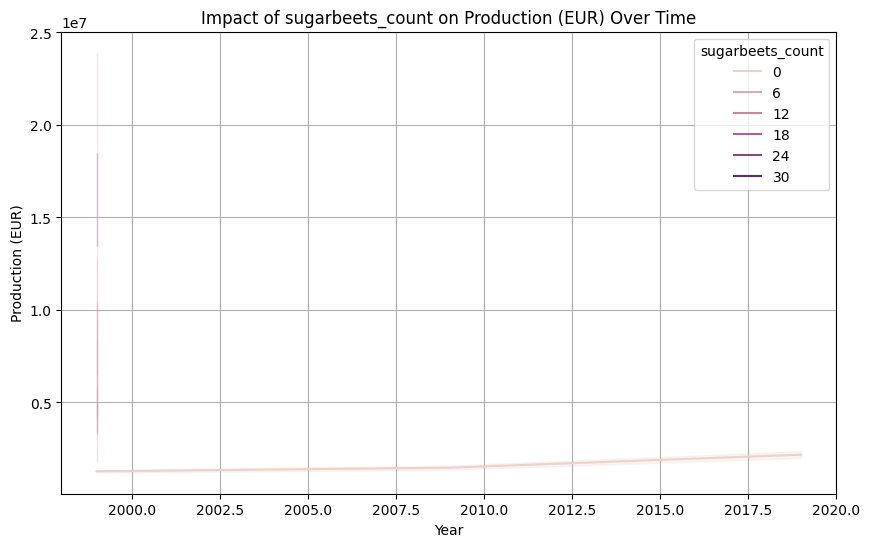

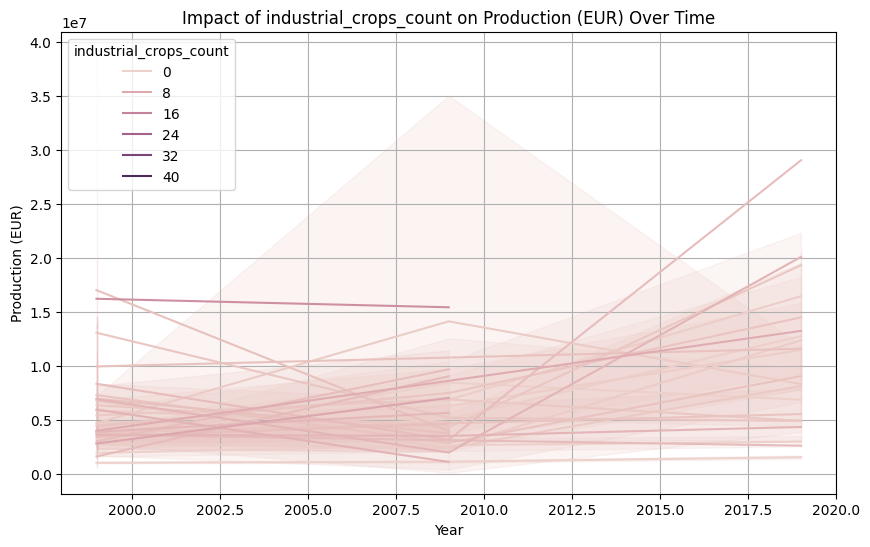

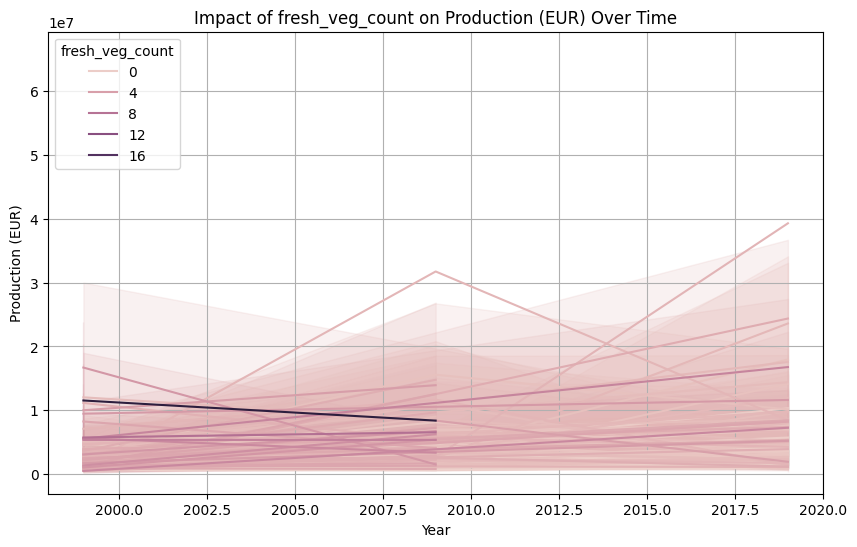

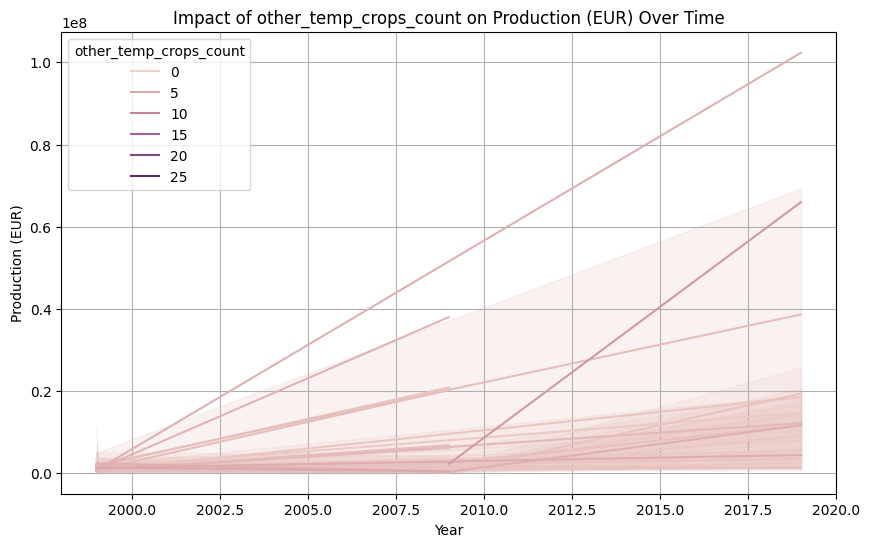

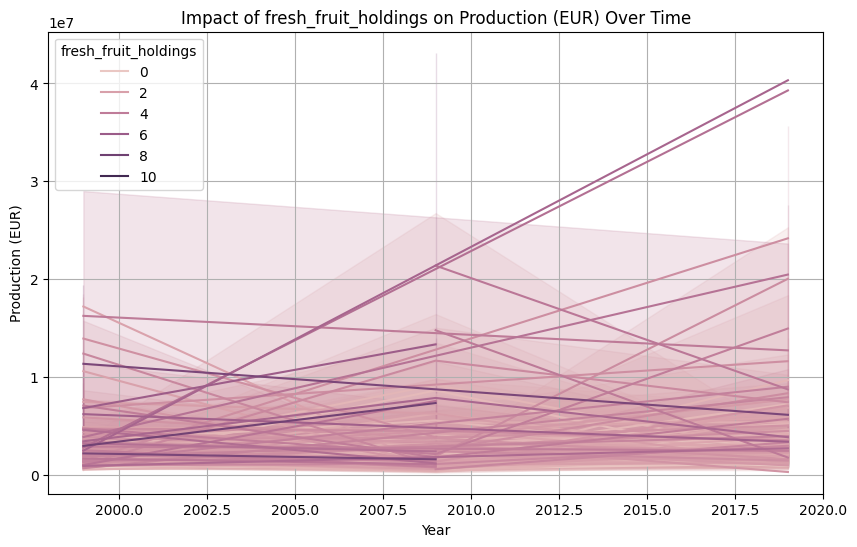

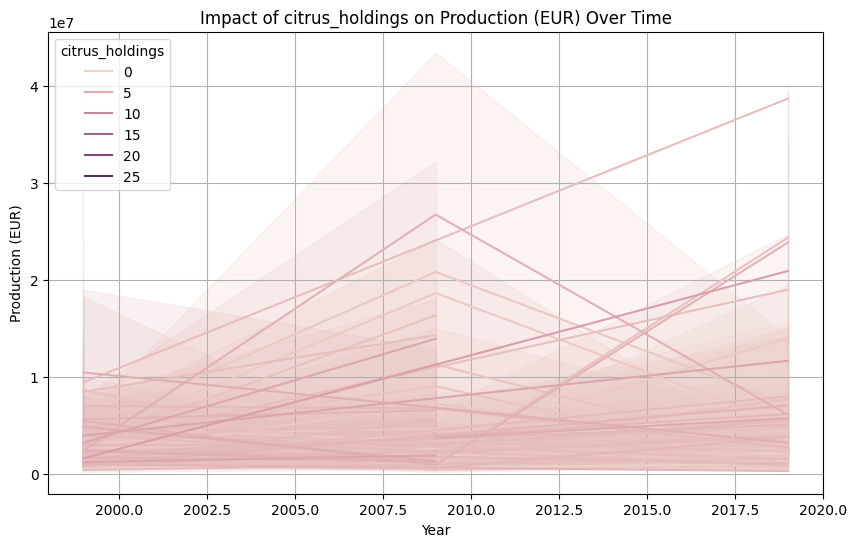

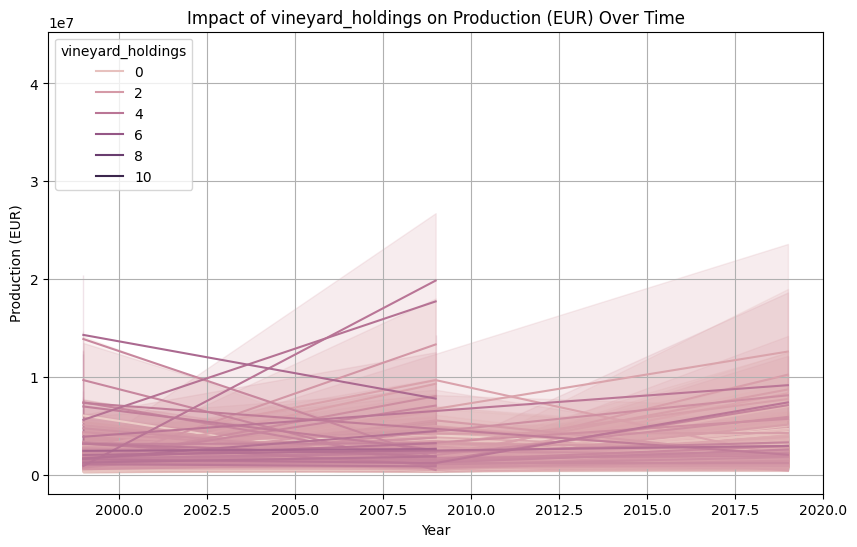

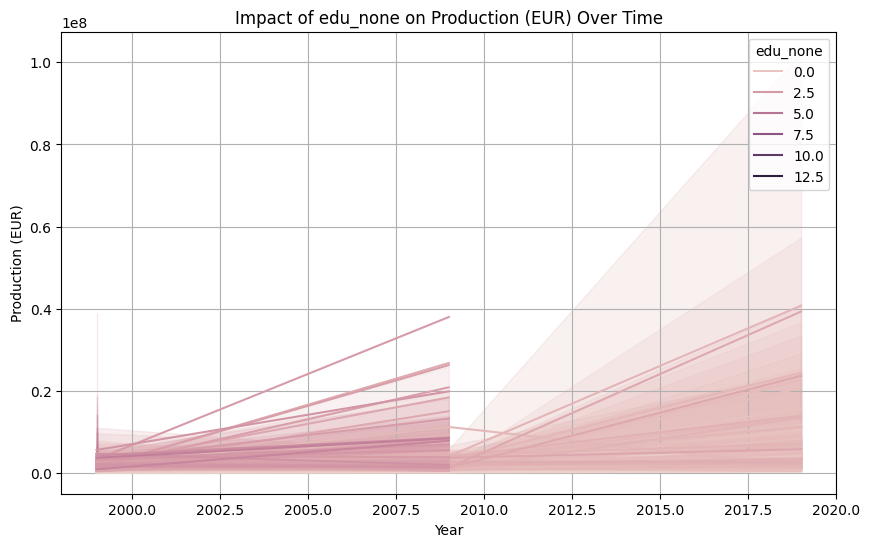

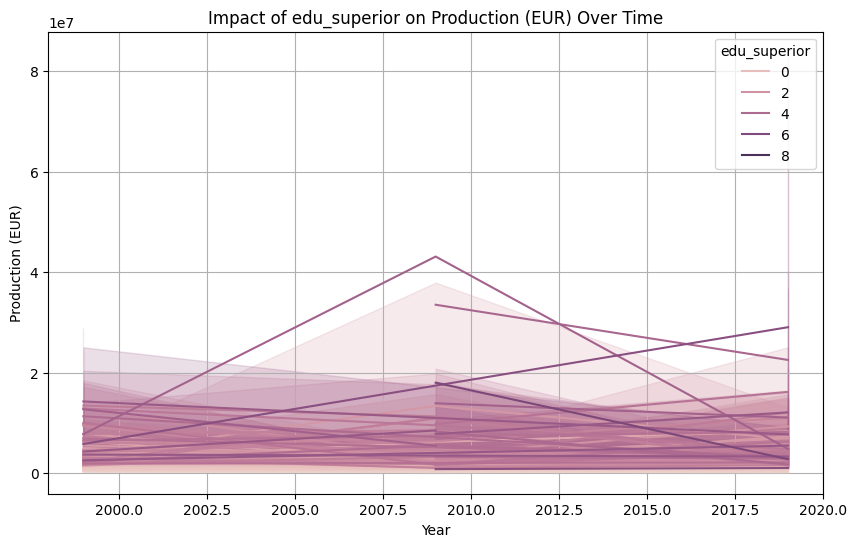

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract significant interaction terms
significant_interactions = result.pvalues[result.pvalues < 0.05].index
significant_interactions = [col for col in significant_interactions if '_year' in col]

# Plot the interaction effects over time
for col in significant_interactions:
    predictor = col.replace('_year', '')
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='year', y='production_eur', hue=predictor, data=data_filtered)
    plt.title(f'Impact of {predictor} on Production (EUR) Over Time')
    plt.xlabel('Year')
    plt.ylabel('Production (EUR)')
    plt.legend(title=predictor)
    plt.grid(True)
    plt.show()


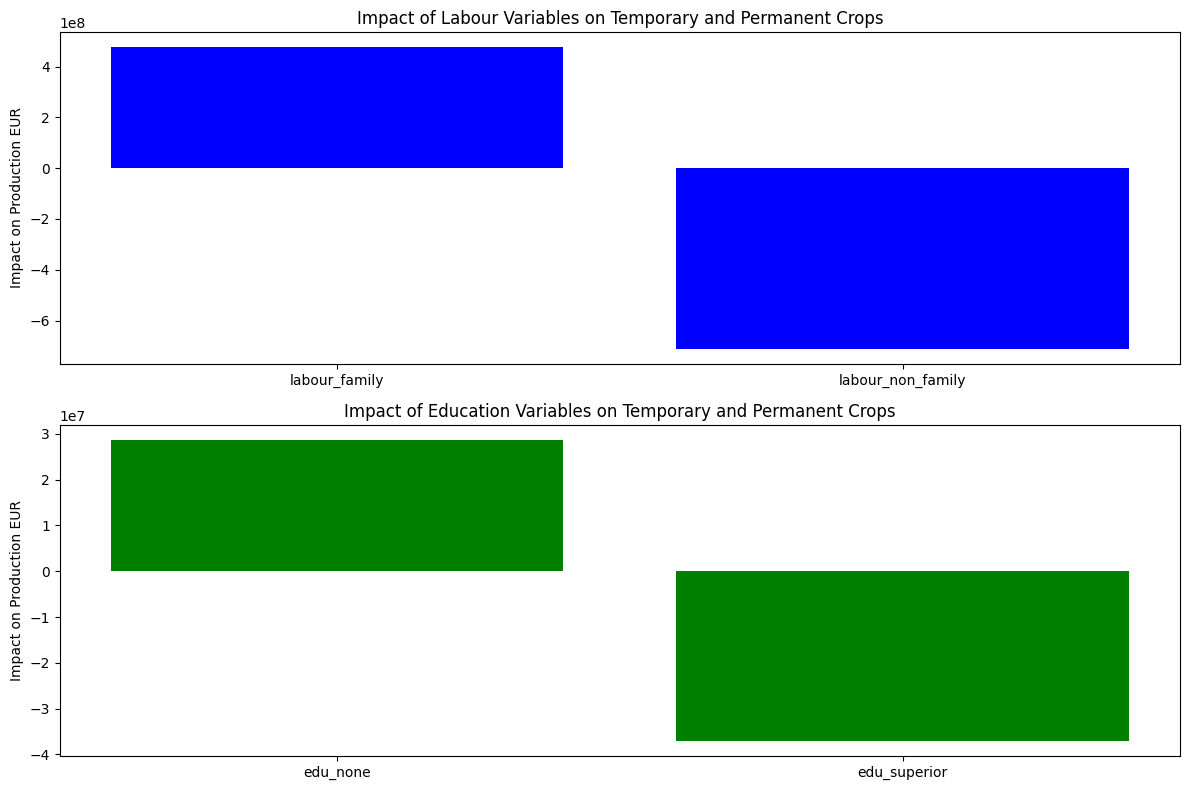

In [44]:
##not very useful

import matplotlib.pyplot as plt
import numpy as np

# Example coefficients (replace with your actual coefficients)
labour_coeffs = {
    'labour_family': 476131688.604,
    'labour_holder': -375052628.130,
    'labour_spouse': -51790909.121,
    'labour_other_family': -80339608.866,
    'labour_non_family': -710588880.050
}

edu_coeffs = {
    'edu_none': 28691223.807,
    'edu_basic': 6708910.738,
    'edu_secondary': -16499482.898,
    'edu_superior': -37091024.378
}

# Temporary crop and permanent crop variables (replace with your actual coefficients)
temporary_crops = ['cereals_count', 'grasses_count', 'fodder_count', 'potatoes_count',
                   'sugarbeets_count', 'industrial_crops_count', 'fresh_veg_count',
                   'other_temp_crops_count', 'fresh_fruit_holdings', 'citrus_holdings',
                   'vineyard_holdings']

# Selecting the top variables with highest impacts
top_labour_vars = ['labour_family', 'labour_non_family']
top_edu_vars = ['edu_none', 'edu_superior']

# Plotting the impacts
plt.figure(figsize=(12, 8))

# Bar plot for labour variables
plt.subplot(2, 1, 1)
labour_impacts = [labour_coeffs[var] for var in top_labour_vars]
plt.bar(np.arange(len(top_labour_vars)), labour_impacts, align='center', color='blue')
plt.xticks(np.arange(len(top_labour_vars)), top_labour_vars)
plt.ylabel('Impact on Production EUR')
plt.title('Impact of Labour Variables on Temporary and Permanent Crops')

# Bar plot for education variables
plt.subplot(2, 1, 2)
edu_impacts = [edu_coeffs[var] for var in top_edu_vars]
plt.bar(np.arange(len(top_edu_vars)), edu_impacts, align='center', color='green')
plt.xticks(np.arange(len(top_edu_vars)), top_edu_vars)
plt.ylabel('Impact on Production EUR')
plt.title('Impact of Education Variables on Temporary and Permanent Crops')

plt.tight_layout()
plt.show()


## LDA ##

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Define columns for temporary crops, permanent crops, and socio-economic factors
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = ['year'] + temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the predictors
scaler = StandardScaler()
predictor_columns = temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered[predictor_columns] = scaler.fit_transform(data_filtered[predictor_columns])


In [17]:
# Prepare the data for LDA
X = data_filtered[predictor_columns]
y = data_filtered['year']

# Perform LDA
lda = LDA()
X_r2 = lda.fit_transform(X, y)

# Determine the number of linear discriminants
num_components = X_r2.shape[1]
component_names = [f'LD{i+1}' for i in range(num_components)]

# Get the coefficients of the linear discriminants
lda_coefficients = pd.DataFrame(lda.scalings_, index=predictor_columns, columns=component_names)
print(lda_coefficients)


                                    LD1       LD2        LD3
cereals_count                  0.173989  0.114914  -0.514770
dried_pulses_count            -0.071571  0.348430  -0.136352
grasses_count                  0.025771  0.116912  -0.020510
fodder_count                   0.025736 -0.562657   0.492375
potatoes_count                -0.313845 -0.163490   1.071818
sugarbeets_count              -0.036239 -0.190306   0.399727
industrial_crops_count        -0.062161 -0.159224   0.147104
fresh_veg_count                0.110304  0.016577   0.312977
flowers_count                 -0.090559 -0.147418   0.074315
other_temp_crops_count        -0.076556  0.153881   0.108304
fresh_fruit_holdings           0.084042  0.042810   0.121142
citrus_holdings                0.013252 -0.390229   0.012186
fruit_holdings                 0.015843  0.149590   0.220597
nuts_holdings                 -0.003896  0.076324  -0.012343
olive_holdings                -0.168960 -0.159356   0.103038
vineyard_holdings       

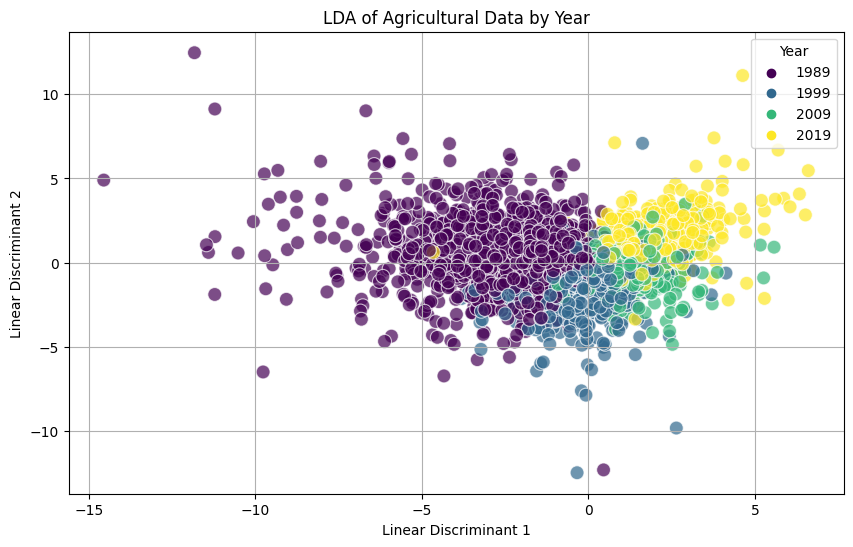

<Figure size 1200x800 with 0 Axes>

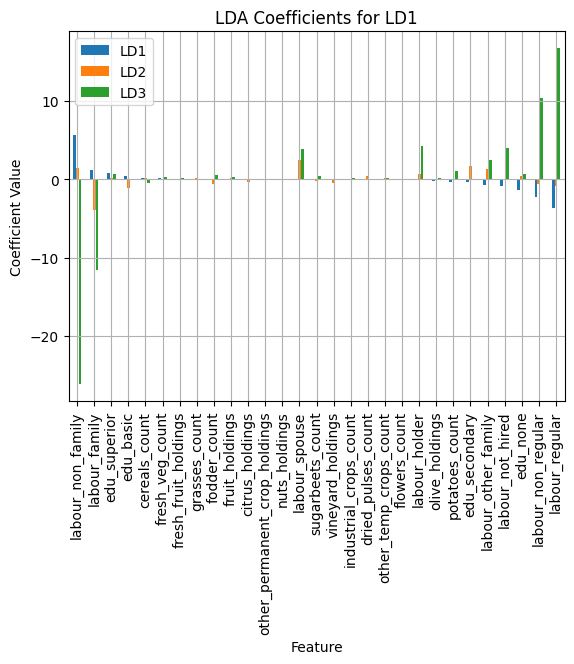

<Figure size 1200x800 with 0 Axes>

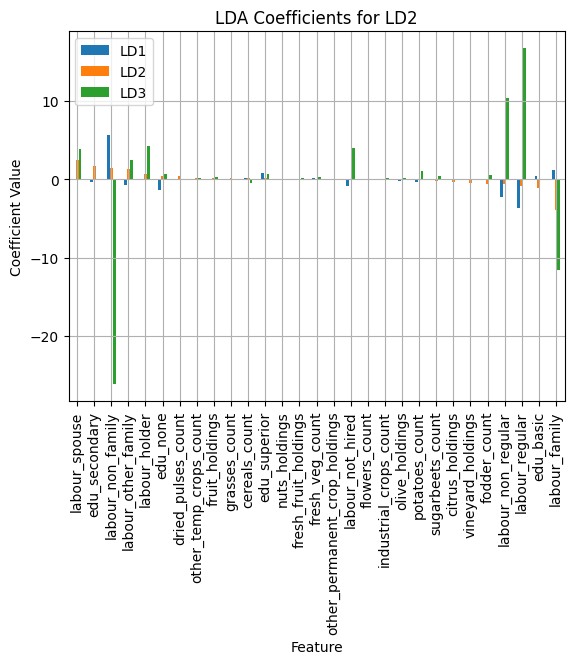

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with LDA results
lda_df = pd.DataFrame(X_r2, columns=component_names)
lda_df['year'] = y

# Plot the first two LDA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='year', data=lda_df, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Agricultural Data by Year')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Plot the coefficients for each linear discriminant
for component in component_names[:2]:  # Assuming we only plot the first two for simplicity
    plt.figure(figsize=(12, 8))
    lda_coefficients.sort_values(by=component, ascending=False).plot(kind='bar')
    plt.title(f'LDA Coefficients for {component}')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()


In [19]:
#another try but this time separating socio econ and ag 

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Define columns for temporary crops, permanent crops, and socio-economic factors
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = ['year'] + temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()



In [20]:
#lda for ag data

# Standardize the agricultural data
agricultural_columns = temp_crop_columns + perm_crop_columns
scaler = StandardScaler()
data_filtered[agricultural_columns] = scaler.fit_transform(data_filtered[agricultural_columns])

# Prepare the data for LDA
X_ag = data_filtered[agricultural_columns]
y = data_filtered['year']

# Perform LDA
lda_ag = LDA()
X_ag_r2 = lda_ag.fit_transform(X_ag, y)

# Determine the number of linear discriminants
num_components_ag = X_ag_r2.shape[1]
component_names_ag = [f'LD{i+1}' for i in range(num_components_ag)]

# Get the coefficients of the linear discriminants
lda_coefficients_ag = pd.DataFrame(lda_ag.scalings_, index=agricultural_columns, columns=component_names_ag)
print(lda_coefficients_ag)


                                    LD1       LD2       LD3
cereals_count                 -0.334850  0.868221 -1.366036
dried_pulses_count            -0.178060  0.894944  0.350464
grasses_count                  0.034363  0.227692  0.074734
fodder_count                   0.137491 -1.070745 -0.076868
potatoes_count                -0.581740 -0.560210  1.170490
sugarbeets_count               0.008195 -0.495930  0.392881
industrial_crops_count        -0.078324 -0.212841  0.219817
fresh_veg_count                0.034531 -0.010168  0.130927
flowers_count                 -0.054629 -0.163464 -0.010147
other_temp_crops_count        -0.376638  0.171825  0.177309
fresh_fruit_holdings          -0.044161  0.299960  0.142866
citrus_holdings               -0.247133 -0.305795 -0.333329
fruit_holdings                 0.334403  0.312488  0.627862
nuts_holdings                  0.077733  0.006337  0.103264
olive_holdings                -0.024804  0.098428  0.368101
vineyard_holdings             -0.024207 

In [21]:
#lda for scio-econ data

# Standardize the socio-economic data
scaler = StandardScaler()
data_filtered[socio_econ_columns] = scaler.fit_transform(data_filtered[socio_econ_columns])

# Prepare the data for LDA
X_se = data_filtered[socio_econ_columns]
y = data_filtered['year']

# Perform LDA
lda_se = LDA()
X_se_r2 = lda_se.fit_transform(X_se, y)

# Determine the number of linear discriminants
num_components_se = X_se_r2.shape[1]
component_names_se = [f'LD{i+1}' for i in range(num_components_se)]

# Get the coefficients of the linear discriminants
lda_coefficients_se = pd.DataFrame(lda_se.scalings_, index=socio_econ_columns, columns=component_names_se)
print(lda_coefficients_se)


                          LD1       LD2        LD3
labour_family        1.936157 -4.804678 -17.788855
labour_holder       -0.217555  0.978393   6.665730
labour_spouse       -0.464959  2.544072   6.141874
labour_other_family -0.961410  1.804311   3.877207
labour_non_family    6.418136  0.660163 -40.369852
labour_regular      -4.176570 -0.380028  25.802650
labour_non_regular  -2.647738 -0.451193  15.978436
labour_not_hired    -0.950222  0.027443   6.218050
edu_none            -1.575642  0.238062   1.399162
edu_basic            0.328660 -1.800257   0.968786
edu_secondary       -0.388830  1.814551  -0.638229
edu_superior         0.685657  0.057241   0.932832


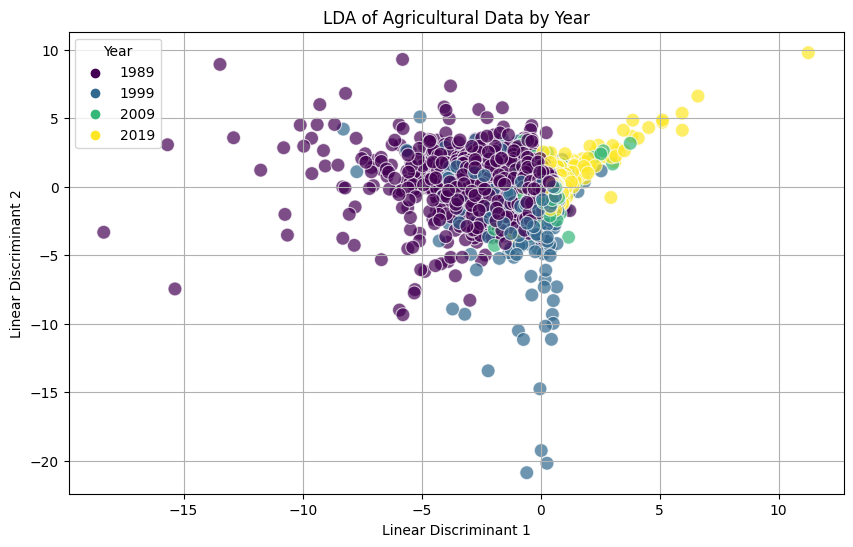

<Figure size 1200x800 with 0 Axes>

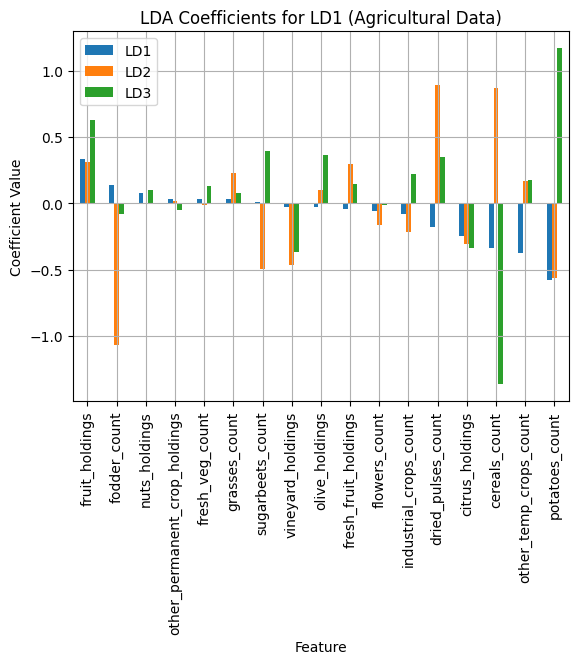

<Figure size 1200x800 with 0 Axes>

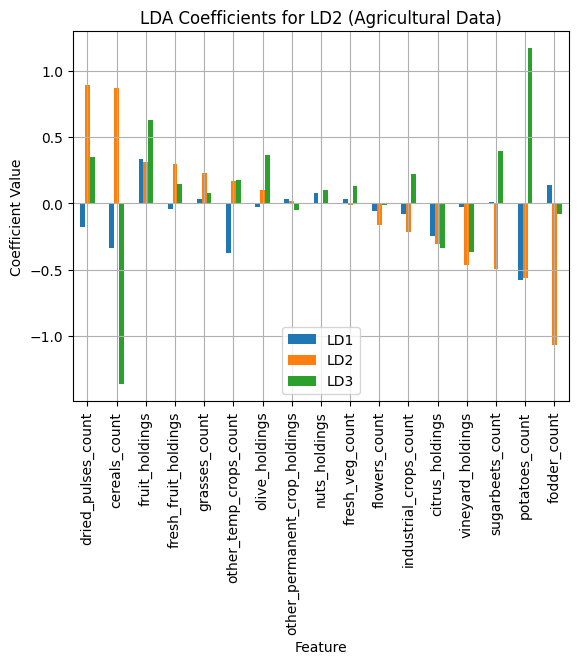

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with LDA results for agricultural data
lda_df_ag = pd.DataFrame(X_ag_r2, columns=component_names_ag)
lda_df_ag['year'] = y

# Plot the first two LDA components for agricultural data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='year', data=lda_df_ag, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Agricultural Data by Year')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Plot the coefficients for each linear discriminant for agricultural data
for component in component_names_ag[:2]:  # Assuming we only plot the first two for simplicity
    plt.figure(figsize=(12, 8))
    lda_coefficients_ag.sort_values(by=component, ascending=False).plot(kind='bar')
    plt.title(f'LDA Coefficients for {component} (Agricultural Data)')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()


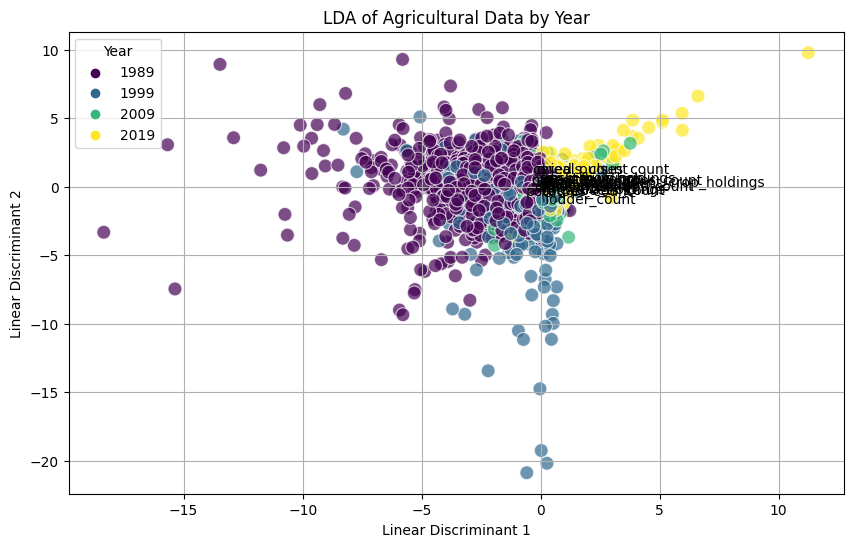

<Figure size 1200x800 with 0 Axes>

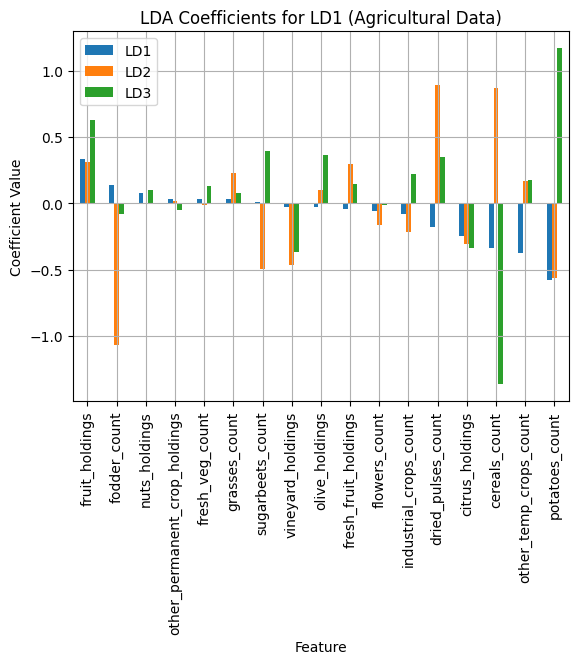

<Figure size 1200x800 with 0 Axes>

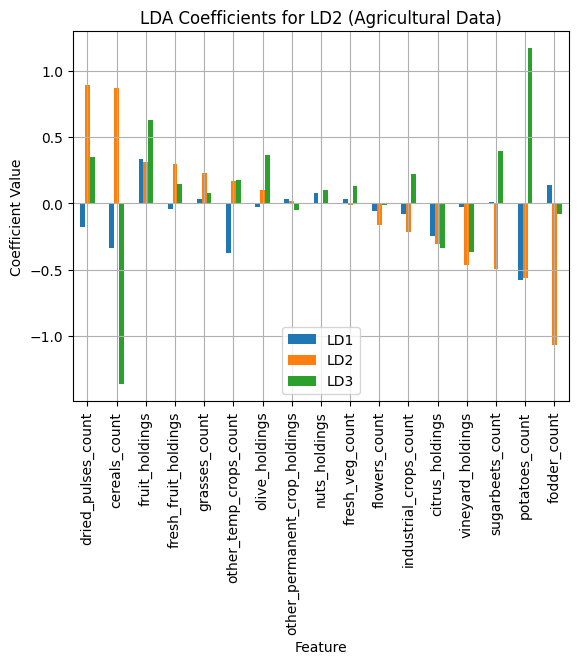

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have already fit your LDA model and have the coefficients and transformed data
# For example:
# lda = LDA(n_components=2)
# X_ag_r2 = lda.fit_transform(X_ag, y)
# lda_coefficients_ag = pd.DataFrame(lda.scalings_, index=feature_names_ag)

# Create a DataFrame with LDA results for agricultural data
lda_df_ag = pd.DataFrame(X_ag_r2, columns=component_names_ag)
lda_df_ag['year'] = y

# Plot the first two LDA components for agricultural data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='year', data=lda_df_ag, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Agricultural Data by Year')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.grid(True)

# Add vector lines (biplot)
scalings = lda_coefficients_ag.iloc[:, :2].values  # Get the coefficients for the first two discriminant functions
for i in range(scalings.shape[0]):
    plt.arrow(0, 0, scalings[i, 0], scalings[i, 1], color='black', alpha=0.5)
    plt.text(scalings[i, 0] * 1.1, scalings[i, 1] * 1.1, lda_coefficients_ag.index[i], color='black')

plt.show()

# Plot the coefficients for each linear discriminant for agricultural data
for component in component_names_ag[:2]:  # Assuming we only plot the first two for simplicity
    plt.figure(figsize=(12, 8))
    lda_coefficients_ag.sort_values(by=component, ascending=False).plot(kind='bar')
    plt.title(f'LDA Coefficients for {component} (Agricultural Data)')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()


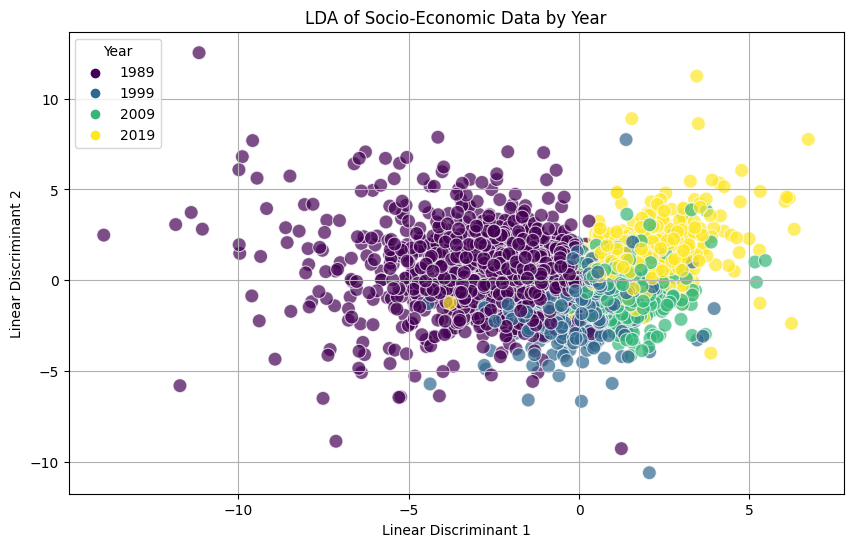

<Figure size 1200x800 with 0 Axes>

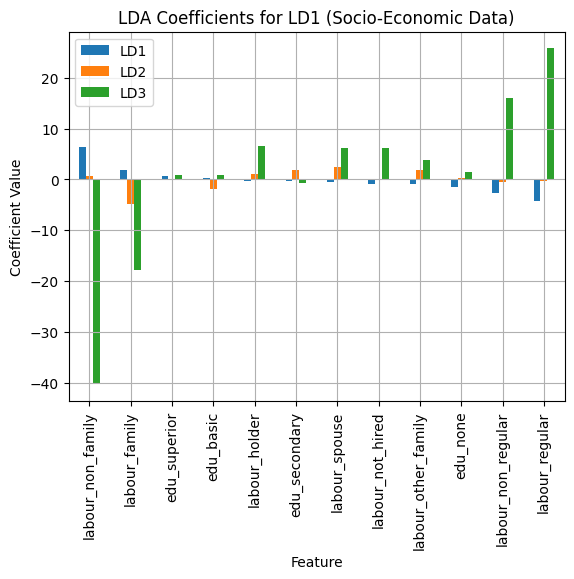

<Figure size 1200x800 with 0 Axes>

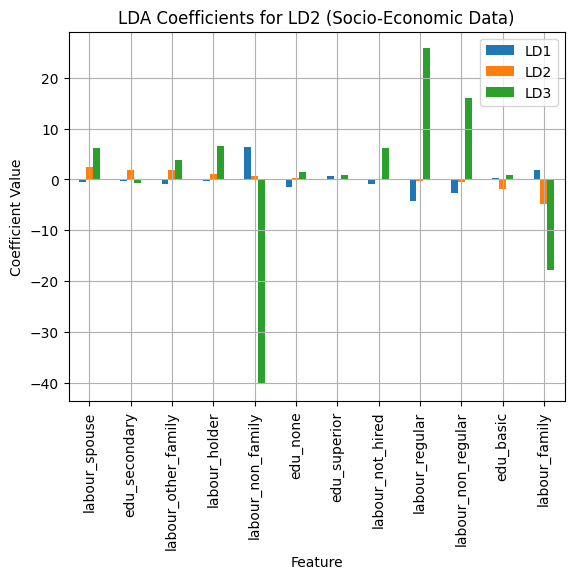

In [24]:
# Create a DataFrame with LDA results for socio-economic data
lda_df_se = pd.DataFrame(X_se_r2, columns=component_names_se)
lda_df_se['year'] = y

# Plot the first two LDA components for socio-economic data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LD1', y='LD2', hue='year', data=lda_df_se, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Socio-Economic Data by Year')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.legend(title='Year')
plt.grid(True)
plt.show()

# Plot the coefficients for each linear discriminant for socio-economic data
for component in component_names_se[:2]:  # Assuming we only plot the first two for simplicity
    plt.figure(figsize=(12, 8))
    lda_coefficients_se.sort_values(by=component, ascending=False).plot(kind='bar')
    plt.title(f'LDA Coefficients for {component} (Socio-Economic Data)')
    plt.xlabel('Feature')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()


## Perform LDA to get scores for ag and socio econ data 

In [25]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Define columns for temporary crops, permanent crops, and socio-economic factors
temp_crop_columns = ['cereals_count', 'dried_pulses_count', 'grasses_count', 'fodder_count', 
                     'potatoes_count', 'sugarbeets_count', 'industrial_crops_count', 
                     'fresh_veg_count', 'flowers_count', 'other_temp_crops_count']

perm_crop_columns = ['fresh_fruit_holdings', 'citrus_holdings', 'fruit_holdings', 'nuts_holdings', 
                     'olive_holdings', 'vineyard_holdings', 'other_permanent_crop_holdings']

socio_econ_columns = ['labour_family', 'labour_holder', 'labour_spouse', 'labour_other_family', 
                      'labour_non_family', 'labour_regular', 'labour_non_regular', 'labour_not_hired',
                      'edu_none', 'edu_basic', 'edu_secondary', 'edu_superior']

# Filter the necessary columns
required_columns = ['region_name', 'year'] + temp_crop_columns + perm_crop_columns + socio_econ_columns
data_filtered = data[required_columns]

# Drop rows with missing values
data_filtered = data_filtered.dropna()

# Standardize the agricultural data
agricultural_columns = temp_crop_columns + perm_crop_columns
scaler = StandardScaler()
data_filtered[agricultural_columns] = scaler.fit_transform(data_filtered[agricultural_columns])

# Prepare the data for LDA
X_ag = data_filtered[agricultural_columns]
y = data_filtered['year']

# Perform LDA
lda_ag = LDA()
X_ag_r2 = lda_ag.fit_transform(X_ag, y)

# Add LDA scores to the original dataset
lda_df_ag = pd.DataFrame(X_ag_r2, columns=[f'DA{i+1}' for i in range(X_ag_r2.shape[1])])
data_filtered = pd.concat([data_filtered.reset_index(drop=True), lda_df_ag.reset_index(drop=True)], axis=1)


In [26]:
# Standardize the socio-economic data
scaler = StandardScaler()
data_filtered[socio_econ_columns] = scaler.fit_transform(data_filtered[socio_econ_columns])

# Prepare the data for LDA
X_se = data_filtered[socio_econ_columns]
y = data_filtered['year']

# Perform LDA
lda_se = LDA()
X_se_r2 = lda_se.fit_transform(X_se, y)

# Add LDA scores to the original dataset
lda_df_se = pd.DataFrame(X_se_r2, columns=[f'DA_se{i+1}' for i in range(X_se_r2.shape[1])])
data_filtered = pd.concat([data_filtered.reset_index(drop=True), lda_df_se.reset_index(drop=True)], axis=1)

# Save the resulting dataset to a new CSV file
data_filtered.to_csv('/Users/ines/greendatascience/AVCADo/final_project/INE_with_LDA_scores.csv', index=False)


INE W LDA SCORES

In [27]:
import pandas as pd

# Load the dataset with LDA scores
file_path = '/Users/ines/greendatascience/AVCADo/final_project/INE_with_LDA_scores.csv'
data_with_lda_scores = pd.read_csv(file_path)


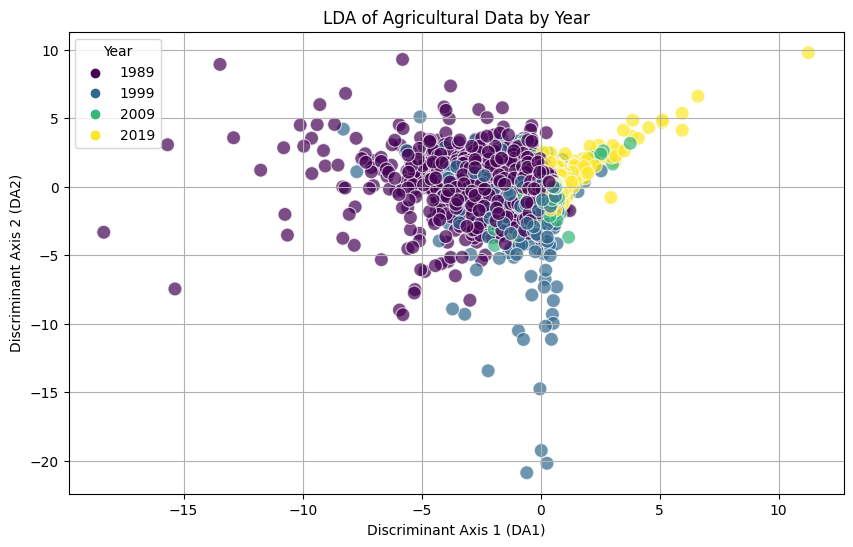

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with LDA results for agricultural data
agricultural_lda_columns = [col for col in data_with_lda_scores.columns if col.startswith('DA') and not col.startswith('DA_se')]
lda_df_ag = data_with_lda_scores[['year'] + agricultural_lda_columns]

# Plot the first two LDA components for agricultural data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DA1', y='DA2', hue='year', data=lda_df_ag, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Agricultural Data by Year')
plt.xlabel('Discriminant Axis 1 (DA1)')
plt.ylabel('Discriminant Axis 2 (DA2)')
plt.legend(title='Year')
plt.grid(True)
plt.show()


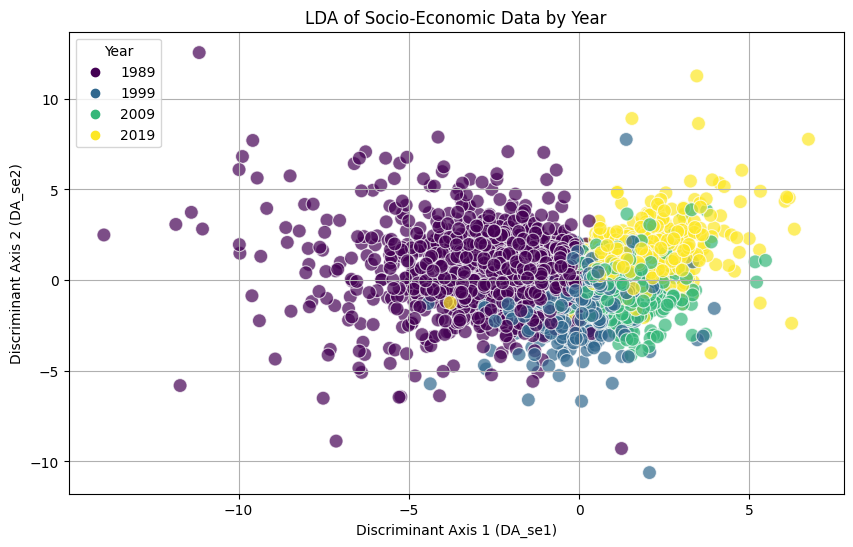

In [29]:
# Create a DataFrame with LDA results for socio-economic data
socio_econ_lda_columns = [col for col in data_with_lda_scores.columns if col.startswith('DA_se')]
lda_df_se = data_with_lda_scores[['year'] + socio_econ_lda_columns]

# Plot the first two LDA components for socio-economic data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DA_se1', y='DA_se2', hue='year', data=lda_df_se, palette='viridis', s=100, alpha=0.7)
plt.title('LDA of Socio-Economic Data by Year')
plt.xlabel('Discriminant Axis 1 (DA_se1)')
plt.ylabel('Discriminant Axis 2 (DA_se2)')
plt.legend(title='Year')
plt.grid(True)
plt.show()
